# Advanced Regression Assignment
## House Price Prediction

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

## Steps

Following steps are followed;

1) Data Understanding and EDA
2) Data preparation
3) Building and Training model
5) Model Evaluation

## Step 1: Data Understanding and EDA

In [4]:
#Import neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#to see all the rows/columns in scrollable window
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

### Data Dictionary

    MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

## EDA
### Data cleaning

In [5]:
#housingData = pd.read_csv("train.csv")
housingData = pd.read_csv("train.csv", keep_default_na=False, na_values=['NA'])
#housingData = pd.read_csv("train.csv", na_values=['', 'NA', 'N/A', 'NULL', 'NaN'])

In [6]:
housingData.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
housingData.shape

(1460, 81)

In [8]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
percentage_null = (housingData.isnull().sum() / len(housingData)) * 100
percentage_null = percentage_null[percentage_null > 0]
print(percentage_null)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [10]:
null_colum_numeric = housingData[percentage_null.index].select_dtypes(include='number').columns.tolist()
print(null_colum_numeric)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [11]:
housingData['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
housingData['LotFrontage'].mode()

0    60.0
Name: LotFrontage, dtype: float64

In [13]:
housingData['LotFrontage'].fillna(housingData['LotFrontage'].mode()[0], inplace=True)

In [14]:
##### Percentage of NaN values in `MasVnrArea` & `GarageYrBlt` is small so will not drop or impute

null_colum_category = housingData[percentage_null.index].select_dtypes(include='object').columns.tolist()
print(null_colum_category)

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [15]:
housingData[null_colum_category].head()

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0   NaN    BrkFace       Gd       TA           No          GLQ          Unf   
1   NaN       None       Gd       TA           Gd          ALQ          Unf   
2   NaN    BrkFace       Gd       TA           Mn          GLQ          Unf   
3   NaN       None       TA       Gd           No          ALQ          Unf   
4   NaN    BrkFace       Gd       TA           Av          GLQ          Unf   

  Electrical FireplaceQu GarageType GarageFinish GarageQual GarageCond PoolQC  \
0      SBrkr         NaN     Attchd          RFn         TA         TA    NaN   
1      SBrkr          TA     Attchd          RFn         TA         TA    NaN   
2      SBrkr          TA     Attchd          RFn         TA         TA    NaN   
3      SBrkr          Gd     Detchd          Unf         TA         TA    NaN   
4      SBrkr          TA     Attchd          RFn         TA         TA    NaN   

  Fence MiscFeature  
0   NaN         NaN  
1   NaN         NaN  
2   NaN         NaN  
3   NaN         NaN  
4   NaN         NaN

In [16]:
for column in ['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature']:
    print(housingData[column].value_counts())

Alley
Grvl    50
Pave    41
Name: count, dtype: int64
FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64
PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64
MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64


In [17]:
for column in ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']:
    housingData[column] = housingData[column].fillna('none')

In [18]:
for column in ['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature']:
    print(housingData[column].value_counts())

Alley
none    1369
Grvl      50
Pave      41
Name: count, dtype: int64
FireplaceQu
none    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: count, dtype: int64
PoolQC
none    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64
Fence
none     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64
MiscFeature
none    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64


In [19]:
percentage_null = (housingData.isnull().sum() / len(housingData)) * 100
percentage_null = percentage_null[percentage_null > 0]
print(percentage_null)

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64


##### comments

In [20]:
housingData = housingData.dropna()

In [21]:
housingData.shape

(1338, 81)

In [22]:
percentage_null = (housingData.isnull().sum() / len(housingData)) * 100
percentage_null = percentage_null[percentage_null > 0]
print(percentage_null)

Series([], dtype: float64)


In [23]:
housingData.duplicated().sum()

0

##### `Id` can be dropped

In [24]:
housingData_cleaned = housingData.drop(['Id'],axis=1)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
housingData_cleaned['SalePrice'].describe()

count      1338.000000
mean     186761.782511
std       78913.847668
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

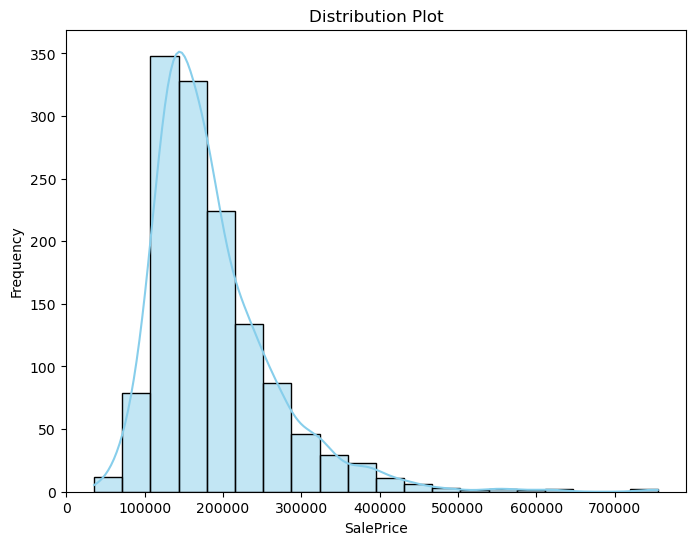

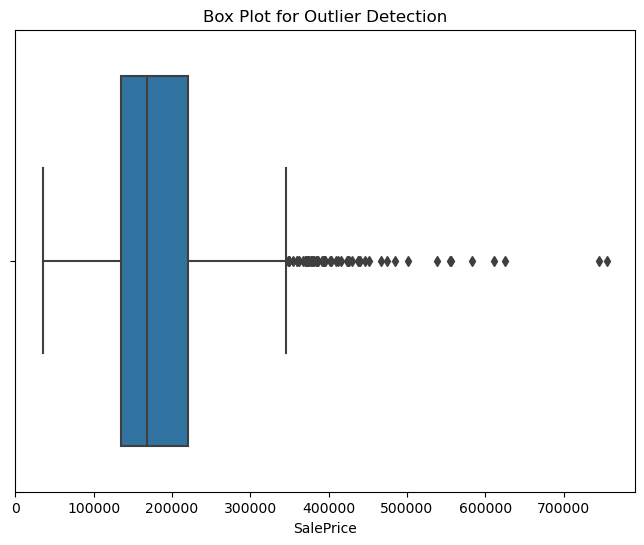

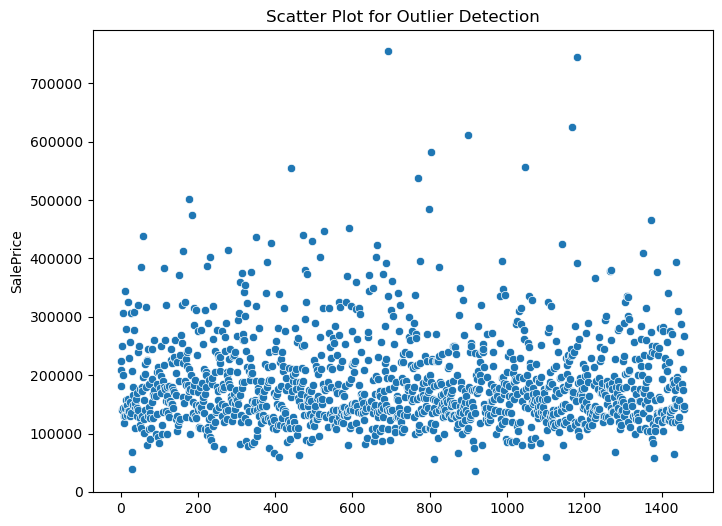

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(housingData_cleaned['SalePrice'], kde=True, color='skyblue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=housingData_cleaned['SalePrice'])
plt.title('Box Plot for Outlier Detection')
plt.show()

# Scatter plot to visualize the data points and identify potential outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=housingData_cleaned.index, y=housingData_cleaned['SalePrice'])
plt.title('Scatter Plot for Outlier Detection')
plt.show()

In [28]:
k = 1.5
lower_bound = housingData_cleaned['SalePrice'].quantile(0.25) - k * (housingData_cleaned['SalePrice'].quantile(0.75) - housingData_cleaned['SalePrice'].quantile(0.25))
upper_bound = housingData_cleaned['SalePrice'].quantile(0.75) + k * (housingData_cleaned['SalePrice'].quantile(0.75) - housingData_cleaned['SalePrice'].quantile(0.25))

# Remove outliers
housingData_cleaned = housingData_cleaned[(housingData_cleaned['SalePrice'] >= lower_bound) & (housingData_cleaned['SalePrice'] <= upper_bound)]

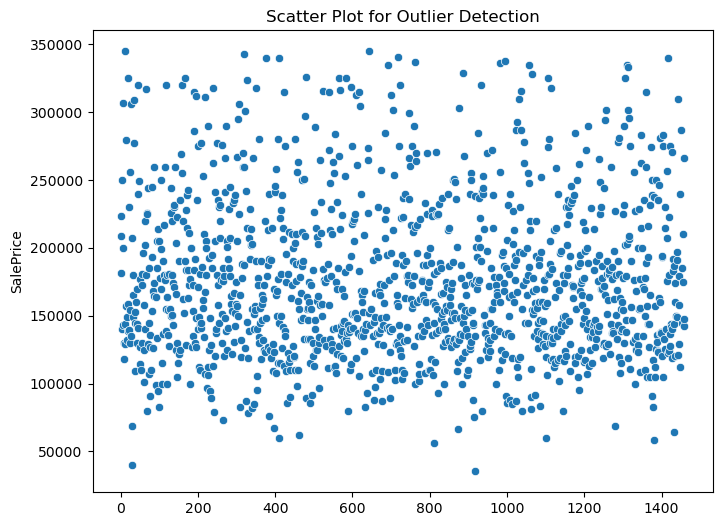

In [29]:
# Scatter plot to visualize the data points and identify potential outliers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=housingData_cleaned.index, y=housingData_cleaned['SalePrice'])
plt.title('Scatter Plot for Outlier Detection')
plt.show()

##### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

In [30]:
numeric_columns = housingData_cleaned.select_dtypes(include='number')
print(len(numeric_columns.columns))

37


In [31]:
df_columns = numeric_columns.columns
num_columns = len(numeric_columns.columns)

split1 = num_columns // 4
split2 = 2 * split1
split3 = 3 * split1

# Extract parts based on the splits
df_part1 = numeric_columns.iloc[:, :split1]
df_part2 = numeric_columns.iloc[:, split1:split2]
df_part3 = numeric_columns.iloc[:, split2:split3]
df_part4 = numeric_columns.iloc[:, split3:]

# Create two DataFrames based on the column split
#df_first_half = numeric_columns[first_half_columns].copy()
#df_second_half = numeric_columns[second_half_columns].copy()

print(df_part1.columns)
print(df_part2.columns)
print(df_part3.columns)
print(df_part4.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1'],
      dtype='object')
Index(['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')
Index(['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea'],
      dtype='object')
Index(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [32]:
df_part1['SalePrice'] = housingData_cleaned['SalePrice']
df_part2['SalePrice'] = housingData_cleaned['SalePrice']
df_part3['SalePrice'] = housingData_cleaned['SalePrice']

print(df_part1.columns)
print(df_part2.columns)
print(df_part3.columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'SalePrice'],
      dtype='object')
Index(['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'SalePrice'],
      dtype='object')
Index(['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


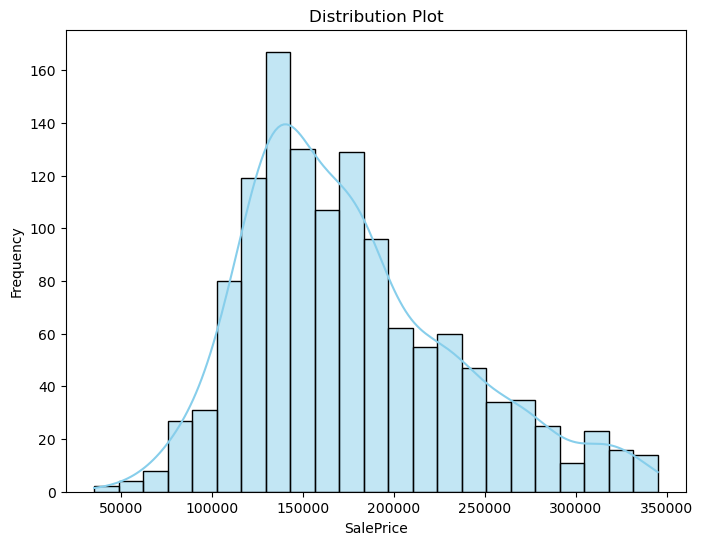

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df_part1['SalePrice'], kde=True, color='skyblue')
plt.title('Distribution Plot')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

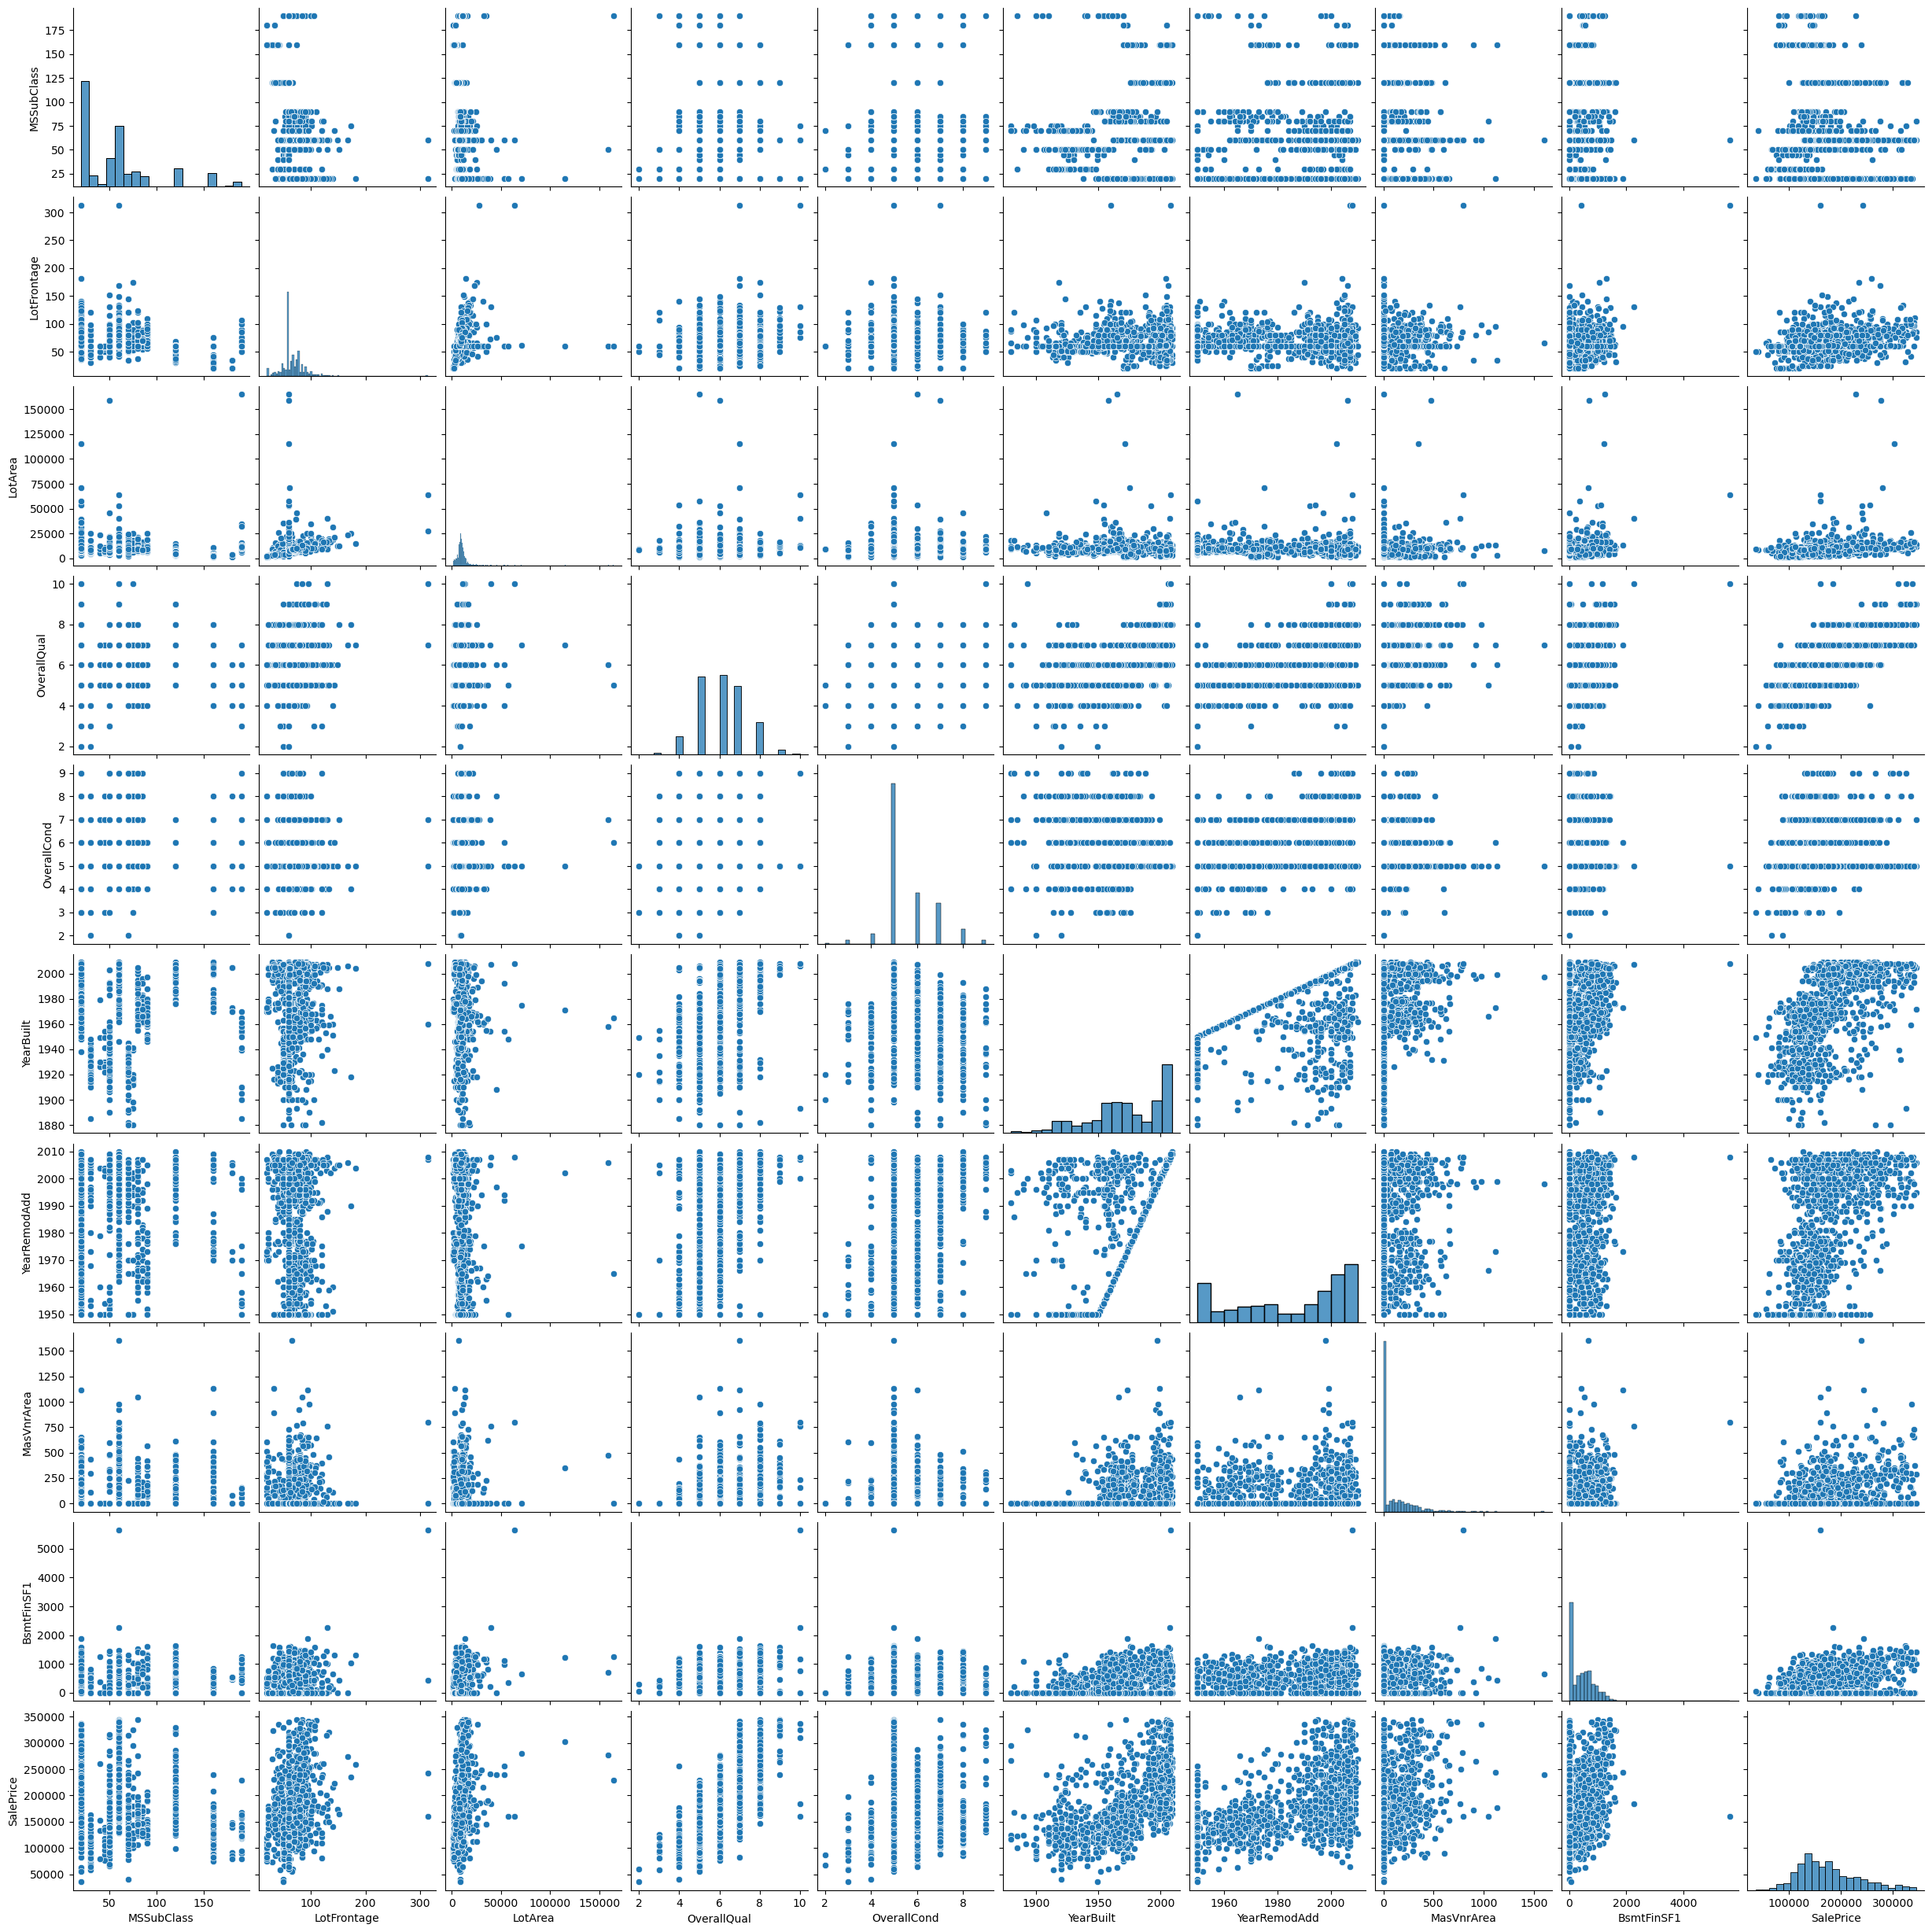

In [34]:
sns.pairplot(df_part1)
plt.show()

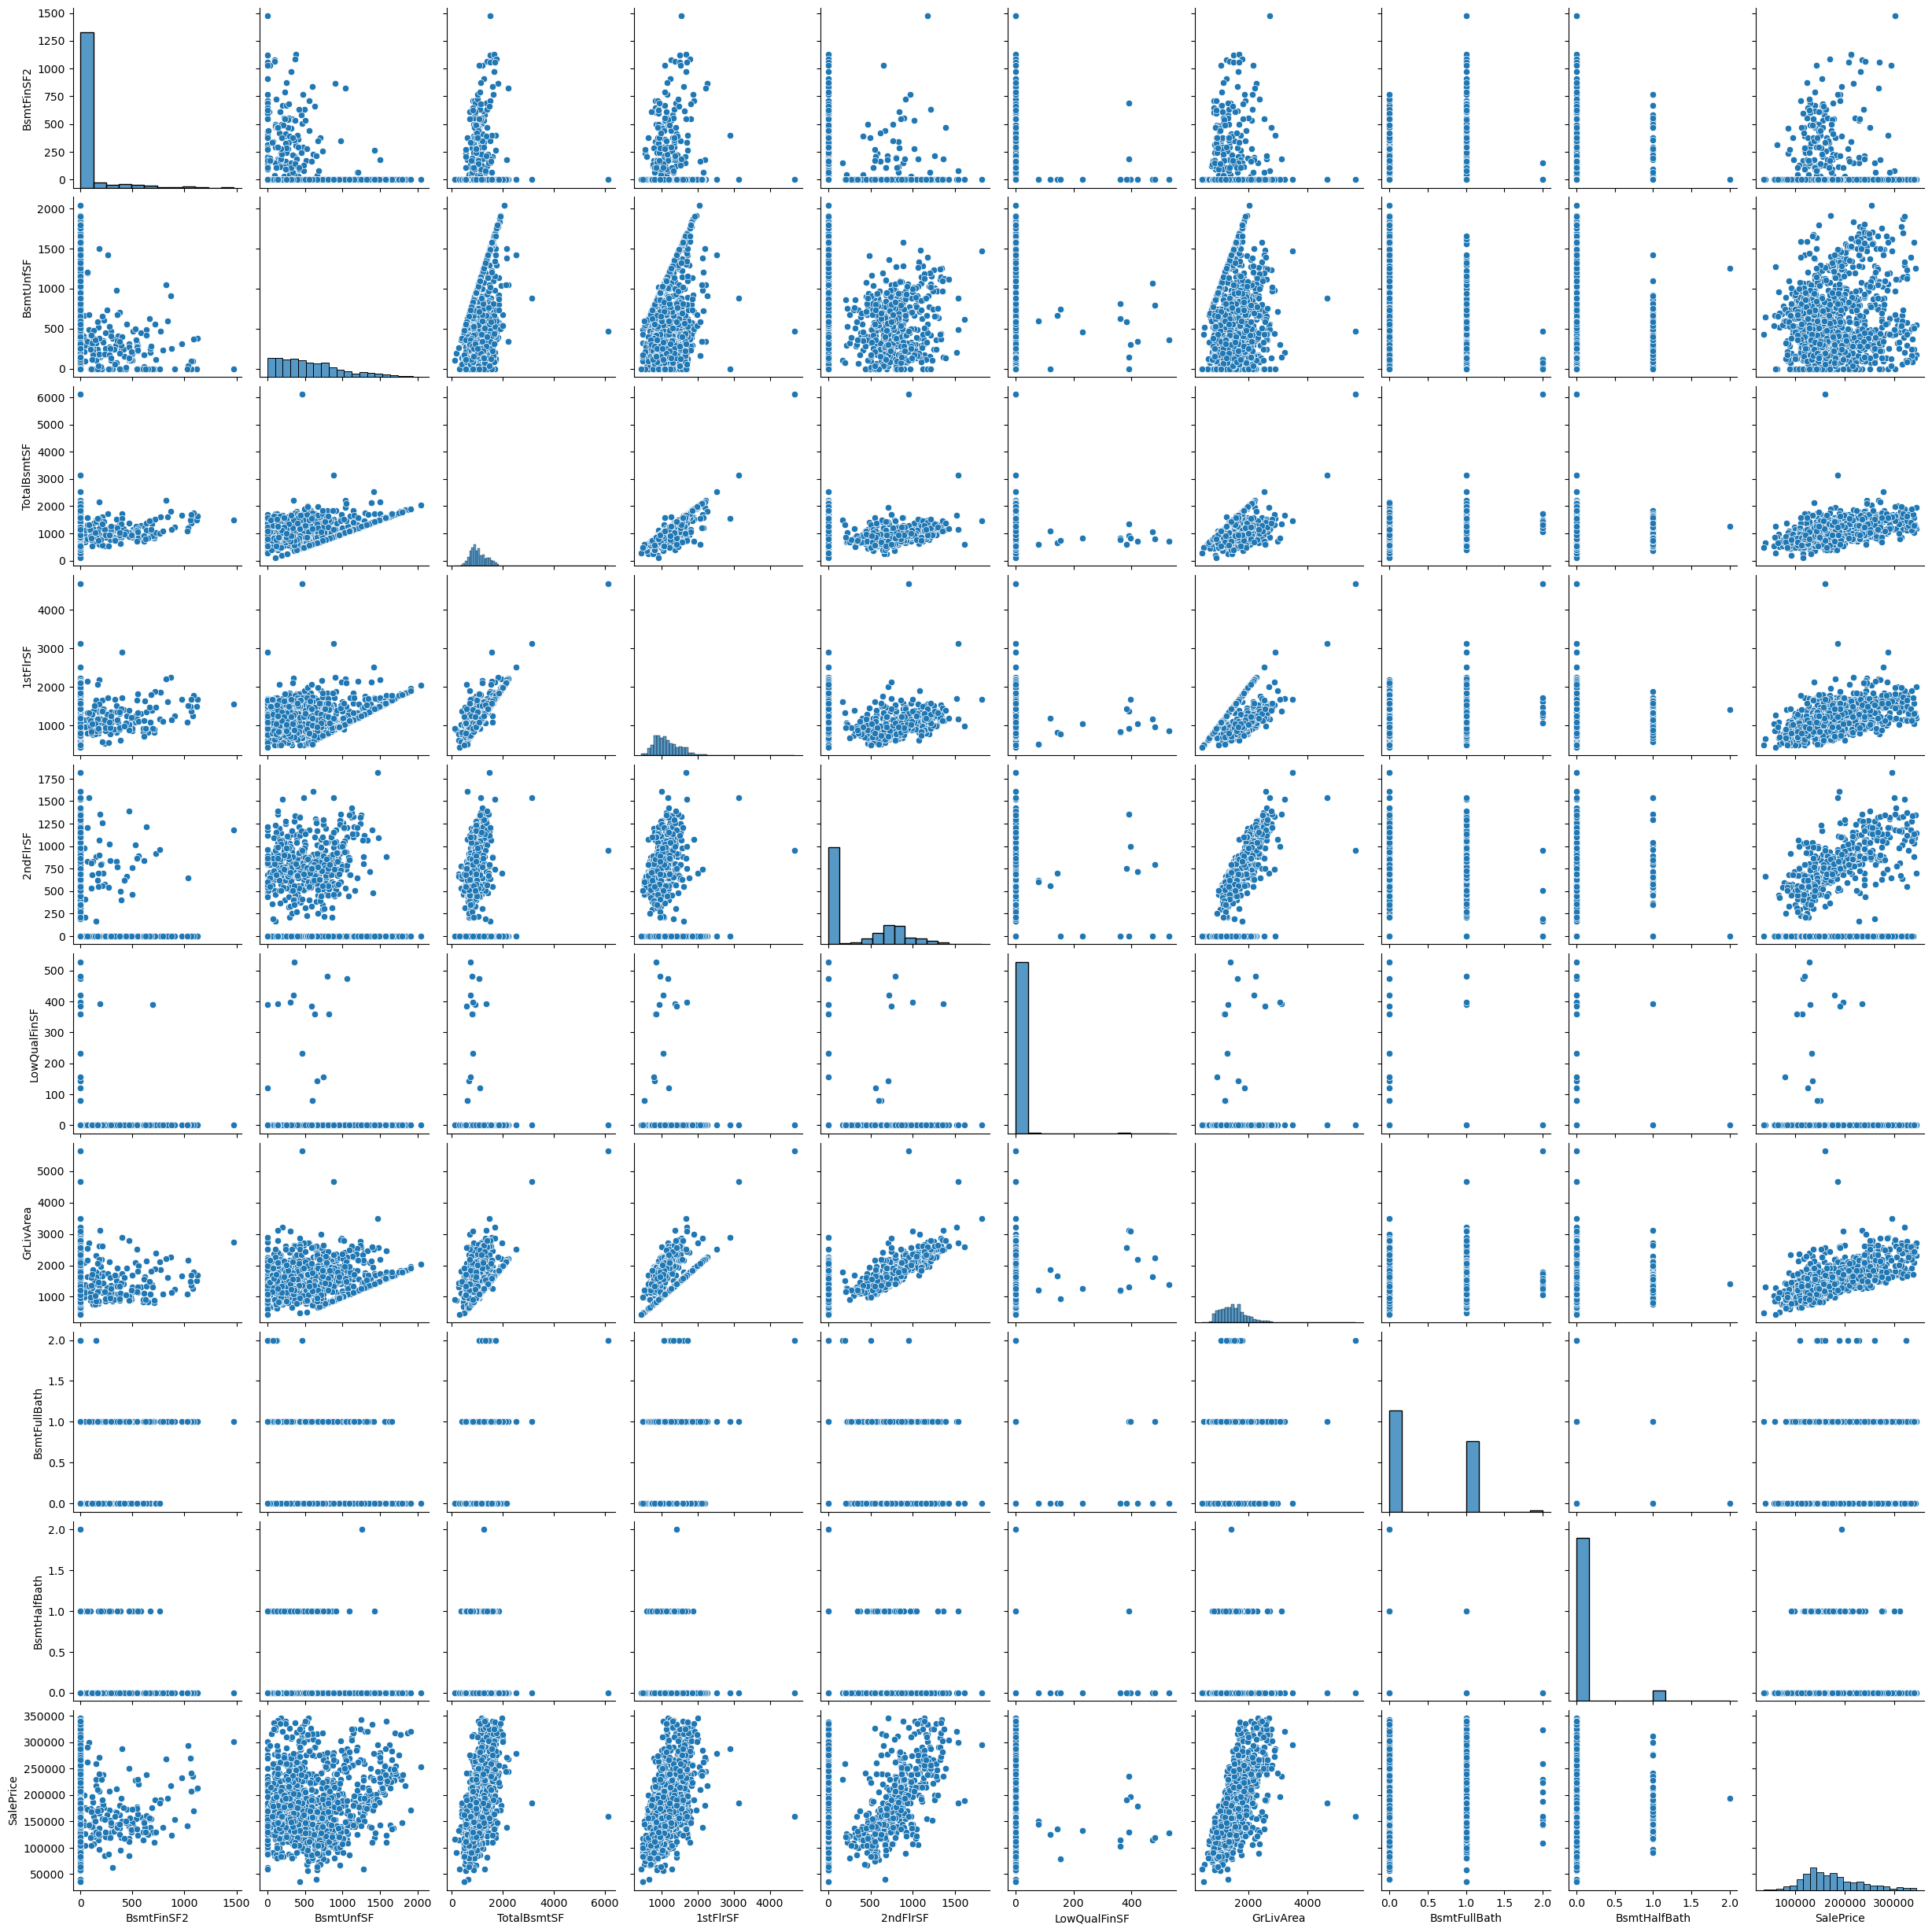

In [35]:
sns.pairplot(df_part2)
plt.show()

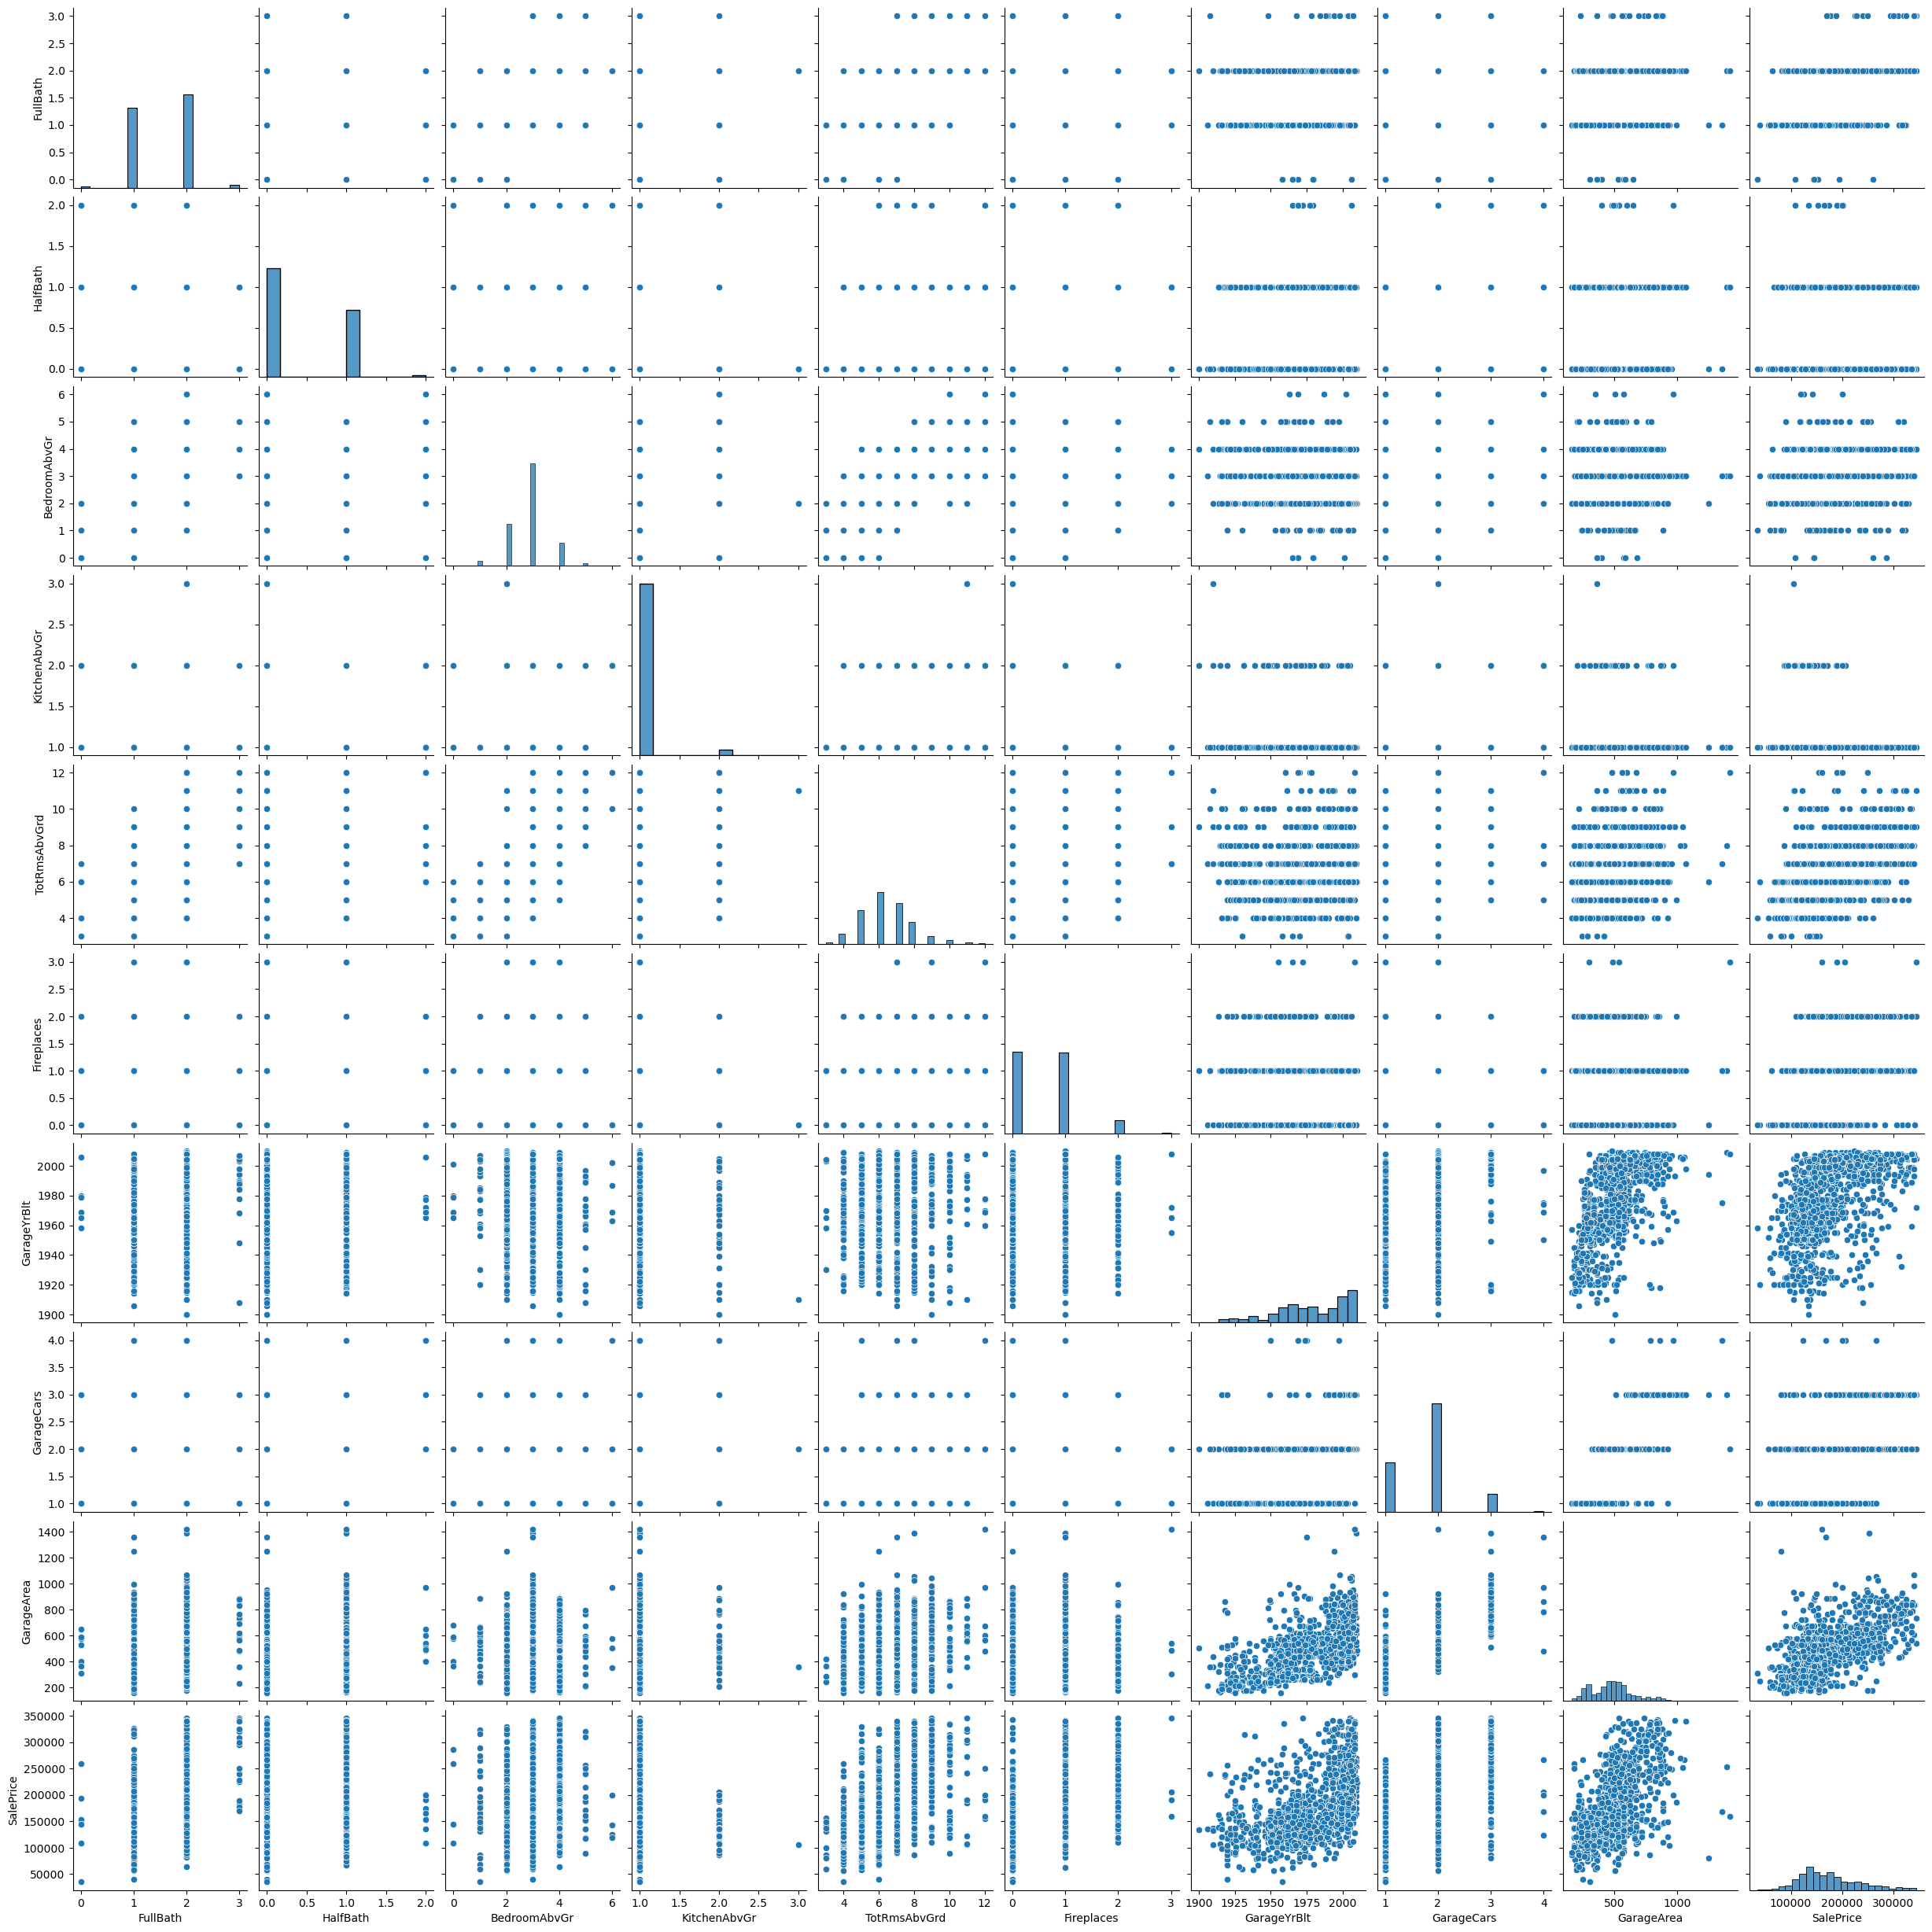

In [36]:
sns.pairplot(df_part3)
plt.show()

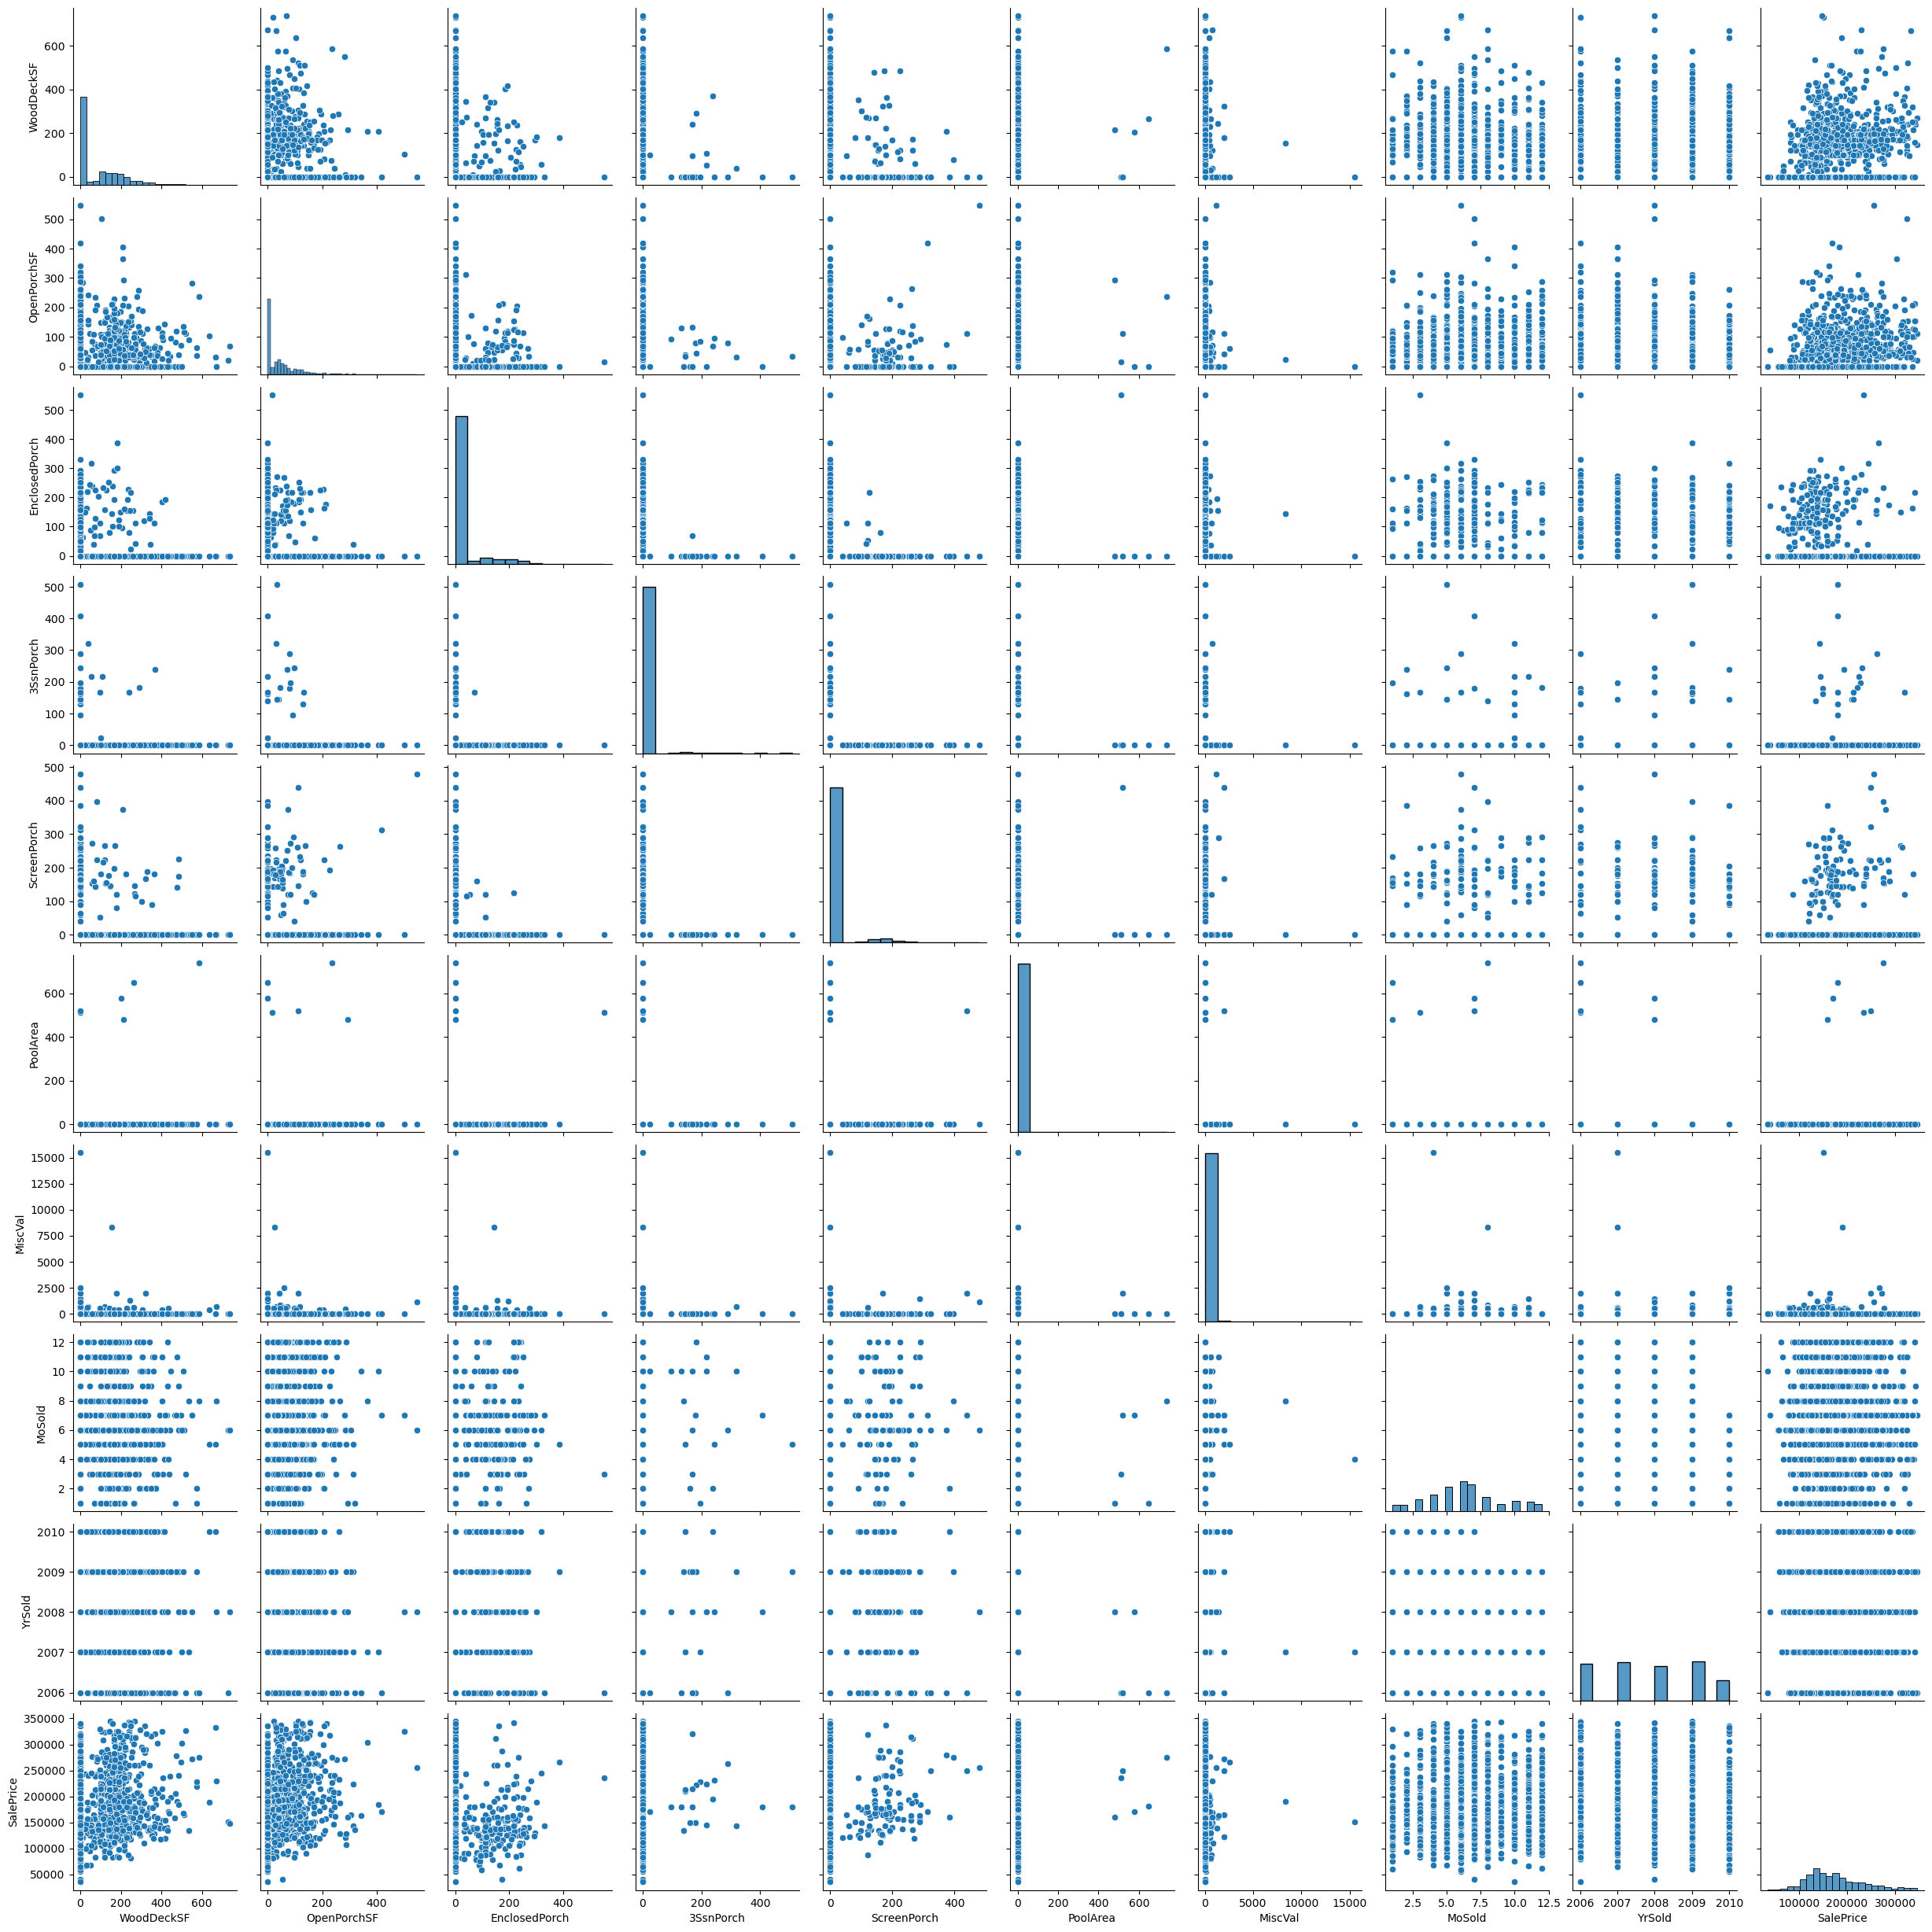

In [37]:
sns.pairplot(df_part4)
plt.show()

#### Observations
- observation#1

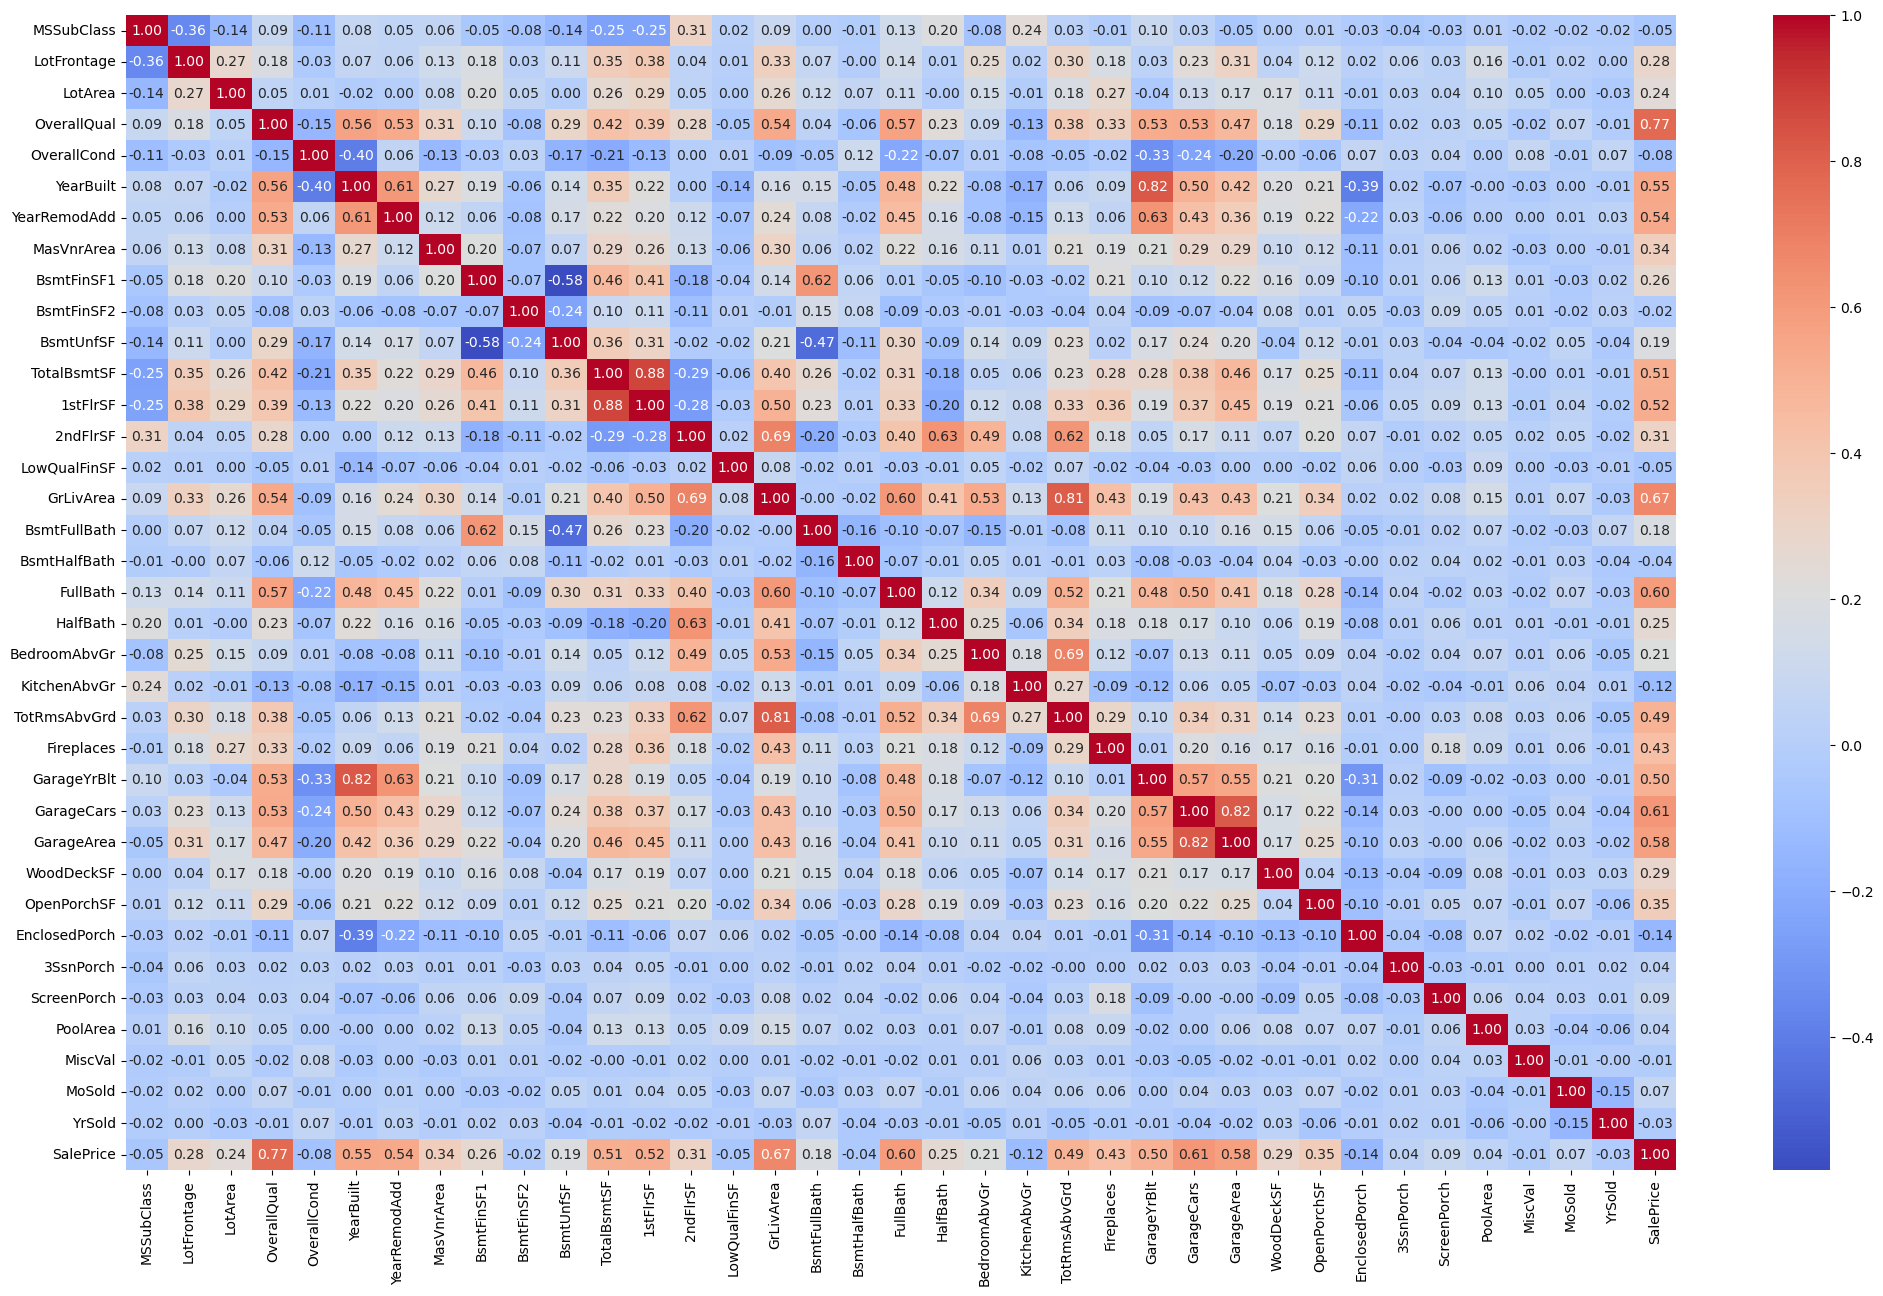

In [38]:
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

#### Observations
- observation #1

##### Visualising Categorical Variables

Let's use boxplot

In [39]:
category_columns = housingData_cleaned.select_dtypes(include='object')
print(len(category_columns.columns))

43


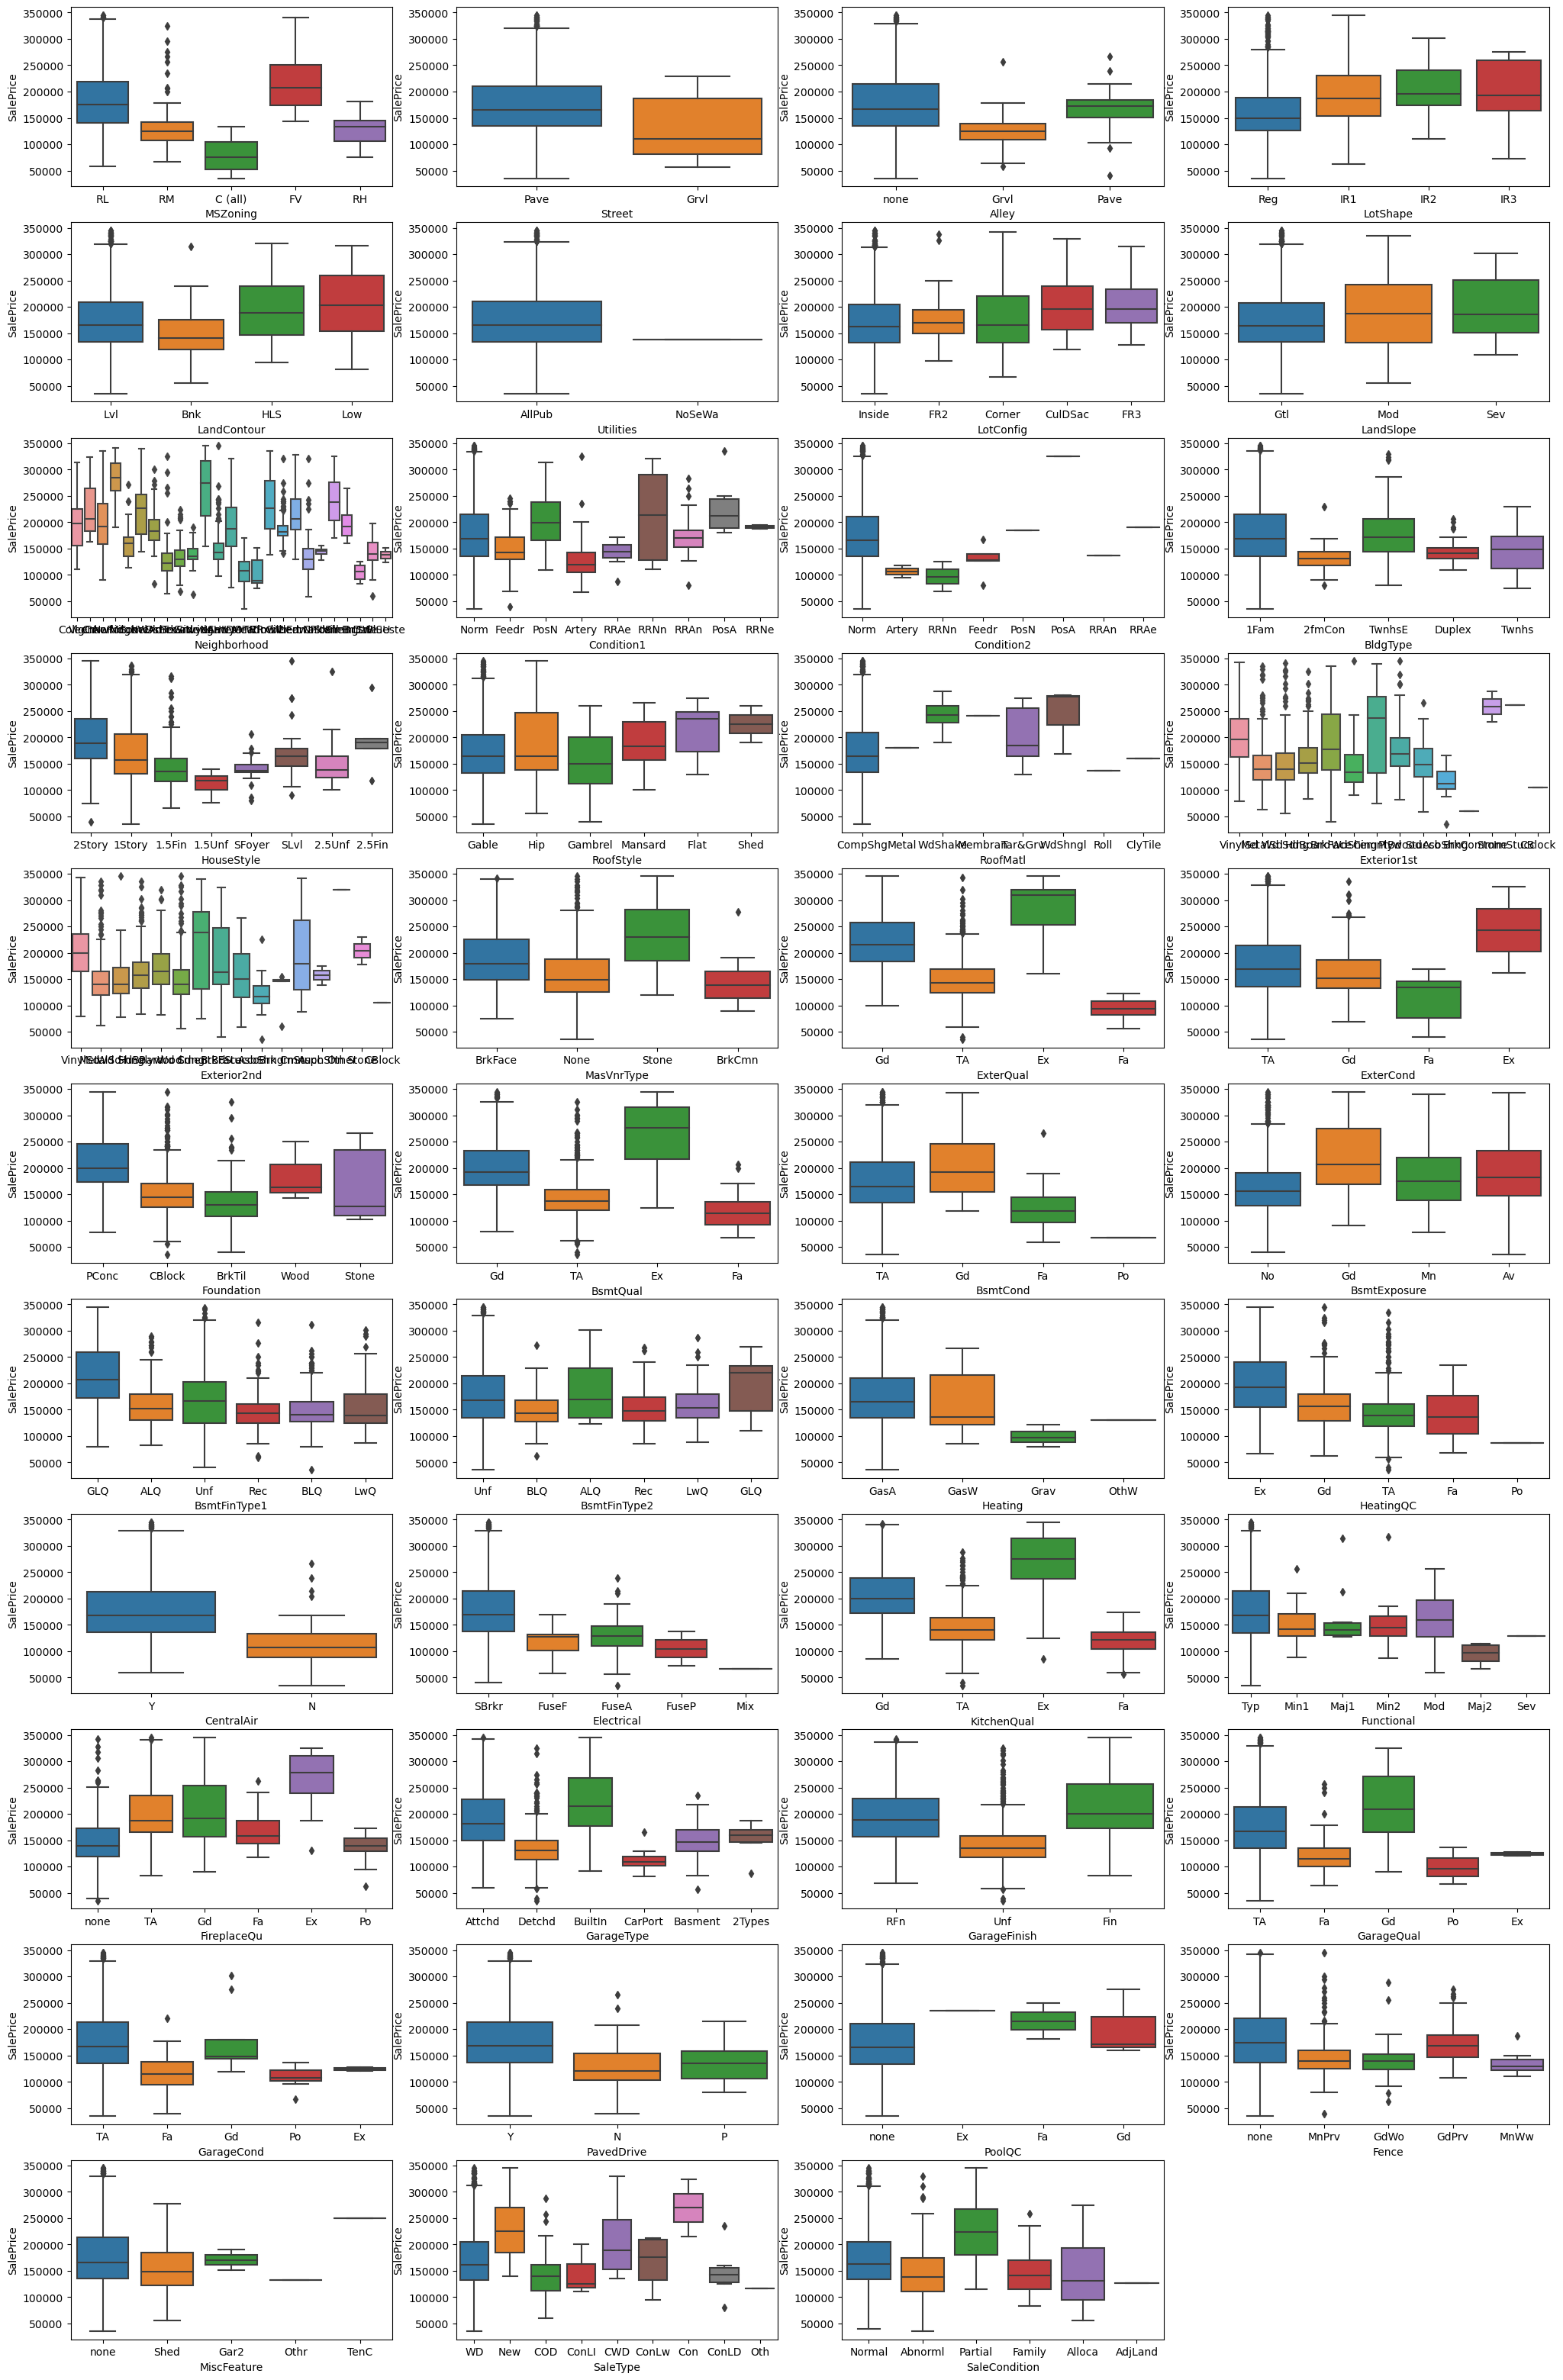

In [40]:
#cols=["season","yr","mnth","holiday","weekday","workingday",'weathersit']
plt.figure(figsize=(25, 80))
i=1
for col in category_columns:
    plt.subplot(22,4,i)
    i=i+1
    sns.boxplot(x=category_columns[col],y=housingData_cleaned['SalePrice'])
plt.show()

##### Observations
- 1) Observation #1

## Step 2: Data Preparation

### Dummy Variables

In [41]:
for column in category_columns:
    print(housingData[column].describe())

count     1338
unique       5
top         RL
freq      1066
Name: MSZoning, dtype: object
count     1338
unique       2
top       Pave
freq      1333
Name: Street, dtype: object
count     1338
unique       3
top       none
freq      1257
Name: Alley, dtype: object
count     1338
unique       4
top        Reg
freq       829
Name: LotShape, dtype: object
count     1338
unique       4
top        Lvl
freq      1206
Name: LandContour, dtype: object
count       1338
unique         2
top       AllPub
freq        1337
Name: Utilities, dtype: object
count       1338
unique         5
top       Inside
freq         957
Name: LotConfig, dtype: object
count     1338
unique       3
top        Gtl
freq      1265
Name: LandSlope, dtype: object
count      1338
unique       25
top       NAmes
freq        209
Name: Neighborhood, dtype: object
count     1338
unique       9
top       Norm
freq      1162
Name: Condition1, dtype: object
count     1338
unique       8
top       Norm
freq      1324
Name: Conditi

In [42]:
category_columns_list = category_columns.columns.tolist()
print(category_columns_list)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [43]:
for column in ['Street','Utilities','CentralAir']:
    print(category_columns[column].value_counts())

Street
Pave    1277
Grvl       5
Name: count, dtype: int64
Utilities
AllPub    1281
NoSeWa       1
Name: count, dtype: int64
CentralAir
Y    1221
N      61
Name: count, dtype: int64


In [44]:
for column in category_columns_list:
    print(category_columns[column].value_counts())

MSZoning
RL         1013
RM          189
FV           61
RH           11
C (all)       8
Name: count, dtype: int64
Street
Pave    1277
Grvl       5
Name: count, dtype: int64
Alley
none    1201
Grvl      43
Pave      38
Name: count, dtype: int64
LotShape
Reg    806
IR1    433
IR2     34
IR3      9
Name: count, dtype: int64
LandContour
Lvl    1161
Bnk      52
HLS      39
Low      30
Name: count, dtype: int64
Utilities
AllPub    1281
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     917
Corner     237
CulDSac     82
FR2         42
FR3          4
Name: count, dtype: int64
LandSlope
Gtl    1214
Mod      57
Sev      11
Name: count, dtype: int64
Neighborhood
NAmes      209
CollgCr    144
OldTown     99
Somerst     81
Gilbert     76
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     53
NridgHt     51
BrkSide     47
Crawfor     47
Mitchel     42
Timber      34
NoRidge     31
IDOTRR      29
ClearCr     26
SWISU       20
Blmngtn     17
StoneBr     16
BrDale      15
MeadowV     1

In [45]:
category_columns_more_states = category_columns_list
for column in ['Street','Utilities','CentralAir']:
    category_columns_more_states.remove(column)
category_columns_more_states

['MSZoning',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [82]:
housingData_DV = housingData_cleaned.copy(deep=True)
housingData_DV.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave  none      Reg   
1          20       RL         80.0     9600   Pave  none      Reg   
2          60       RL         68.0    11250   Pave  none      IR1   
3          70       RL         60.0     9550   Pave  none      IR1   
4          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        none   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [83]:
replace_values = {'Grvl':0,'Pave':1}
housingData_DV['Street'] = housingData_DV['Street'].map(replace_values)

replace_values = {'NoSeWa':0,'AllPub':1}
housingData_DV['Utilities'] = housingData_DV['Utilities'].map(replace_values)

replace_values = {'N':0,'Y':1}
housingData_DV['CentralAir'] = housingData_DV['CentralAir'].map(replace_values)

housingData_DV[['Street','Utilities','CentralAir']]

housingData_DV.shape

(1282, 80)

In [84]:
for column in category_columns_more_states:
    # Let's drop the first column from status df using 'drop_first = True'
    status = pd.get_dummies(housingData_DV[column], drop_first = True, dtype=int)

    # Drop 'season' as we have created the dummies for it
    housingData_DV.drop([column], axis = 1, inplace = True)

    # Add the results to the original housing dataframe
    housingData_DV = pd.concat([housingData_DV, status], axis = 1)

housingData_DV.shape

(1282, 246)

In [85]:
housingData_DV.head()

MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  \
0          60         65.0     8450       1          1            7   
1          20         80.0     9600       1          1            6   
2          60         68.0    11250       1          1            7   
3          70         60.0     9550       1          1            7   
4          60         84.0    14260       1          1            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0            5       2003          2003       196.0         706           0   
1            8       1976          1976         0.0         978           0   
2            5       2001          2002       162.0         486           0   
3            5       1915          1970         0.0         216           0   
4            5       2000          2000       350.0         655           0   

   BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856           1       856       854             0   
1        284         1262           1      1262         0             0   
2        434          920           1       920       866             0   
3        540          756           1       961       756             0   
4        490         1145           1      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  FV  RH  RL  RM  Pave  none  \
0         0        0       2    2008     208500   0   0   1   0     0     1   
1         0        0       5    2007     181500   0   0   1   0     0     1   
2         0        0       9    2008     223500   0   0   1   0     0     1   
3         0        0       2    2006     140000   0   0   1   0     0     1   
4         0        0      12    2008     250000   0   0   1   0     0     1   

   IR2  IR3  Reg  HLS  Low  Lvl  CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  \
0    0    0    1    0    0    1        0    0    0       1    0    0        0   
1    0    0    1    0    0    1        0    1    0       0    0    0        0   
2    0    0    0    0    0    1        0    0    0       1    0    0        0   
3    0    0    0    0    0    1        0    0    0       0    0    0        0   
4    0    0    0    0    0    1        0    1    0       0    0    0        0   

   BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  \
0       0        0        0        1        0        0        0       0   
1       0        0        0        0        0        0        0       0   
2       0        0        0        1        0        0        0       0   
3       0  

In [86]:
housingData_DV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1282 entries, 0 to 1459
Columns: 246 entries, MSSubClass to Partial
dtypes: float64(3), int64(243)
memory usage: 2.4 MB


### Splitting the Data into Training and Testing Sets

In [87]:
from sklearn.model_selection import train_test_split

In [337]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(housingData_DV, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(897, 246)
(385, 246)


### Scaling the Features 

We will use MinMax scaling.

In [338]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [339]:
numeric_columns_list = numeric_columns.columns.tolist()
#numeric_columns_list.remove('SalePrice')
print(numeric_columns_list)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [340]:
pd.set_option('display.max_columns', None)

In [341]:
df_train.head()

MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  \
94            60         69.0     9337       1          1            6   
740           70         60.0     9600       1          1            5   
1435          20         80.0     8400       1          1            6   
439           50         67.0    12354       1          1            6   
860           50         55.0     7642       1          1            7   
1134          60         57.0     8773       1          1            6   
120           80         60.0    21453       1          1            6   
501           60         75.0     9803       1          1            7   
1198          20         70.0     9100       1          1            7   
773           20         70.0    10150       1          1            5   
913           90         82.0     6270       1          1            5   
833           20        100.0    10004       1          1            6   
141           20         78.0    11645       1          1            7   
1108          60         60.0     8063       1          1            6   
455           20         80.0     9600       1          1            7   
339           20         66.0    12400       1          1            6   
1224          60         60.0    15384       1          1            7   
679           20         60.0     9945       1          1            5   
814           50         45.0     8248       1          1            5   
993           60         68.0     8846       1          1            6   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
94              5       1997          1997         0.0         648   
740             7       1910          2002         0.0           0   
1435            9       1962          2005       237.0           0   
439             8       1920          2000         0.0           0   
860             8       1918          1998         0.0           0   
1134            5       1997          1997         0.0           0   
120             5       1969          1969         0.0         938   
501             5       2005          2005         0.0         400   
1198            5       2001          2001         0.0           0   
773             5       1958          1958         1.0         456   
913             6       1949          1950         0.0         284   
833             6       1964          1964       180.0         196   
141             5       2005          2005         0.0        1300   
1108            5       2000          2000         0.0           0   
455             6       1973          1973       320.0         916   
339             7       1958          1998       176.0         585   
1224            5       2004          2005         0.0         724   
679             5       1961          1961        57.0         827   
814             7       1918          1950         0.0           0   
993             5       2005          2006         0.0           0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  \
94             0        176          824           1       905       881   
740            0        264          264           1       768       664   
1435           0       1319         1319           1      1537         0   
439            0        684          684           1       684       512   
860            0        912          912           1       912       514   
1134           0        916          916           1       916       684   
120            0          0          938           1       988         0   
501            0        466          866           1       866       902   
1198           0       1212         1212           1      1212         0   
773            0        456          912           1       912         0   
913            0        717         1001           0      1001      1001   
833          345        975         1516           1      1516      

In [343]:
# Applying scaler() to all the train data columns except 'dummy' variables
df_train[numeric_columns_list] = scaler.fit_transform(df_train[numeric_columns_list])

df_train.head()

MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallQual  \
94      0.235294     0.164384  0.048167       1          1        0.500   
740     0.294118     0.133562  0.049778       1          1        0.375   
1435    0.000000     0.202055  0.042425       1          1        0.500   
439     0.176471     0.157534  0.066655       1          1        0.500   
860     0.176471     0.116438  0.037780       1          1        0.625   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
94       0.428571   0.906977      0.783333    0.000000    0.286726   
740      0.714286   0.232558      0.866667    0.000000    0.000000   
1435     1.000000   0.635659      0.916667    0.148125    0.000000   
439      0.857143   0.310078      0.833333    0.000000    0.000000   
860      0.857143   0.294574      0.800000    0.000000    0.000000   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  \
94           0.0   0.092292     0.237059           1  0.159895  0.546865   
740          0.0   0.138437     0.052423           1  0.108352  0.412166   
1435         0.0   0.691662     0.400264           1  0.397667  0.000000   
439          0.0   0.358679     0.190900           1  0.076749  0.317815   
860          0.0   0.478238     0.266073           1  0.162528  0.319056   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
94             0.0   0.311249           0.5           0.0  0.666667       0.5   
740            0.0   0.226883           0.0           0.0  0.666667       0.0   
1435           0.0   0.251907           0.5           0.0  0.333333       0.5   
439            0.0   0.170639           0.0           0.0  0.333333       0.0   
860            0.0   0.225453           0.0           0.0  0.333333       0.5   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
94        0.500000           0.0      0.444444    0.000000     0.889908   
740       0.333333           0.0      0.444444    0.000000     0.091743   
1435      0.500000           0.0      0.444444    0.333333     0.568807   
439       0.500000           0.0      0.444444    0.000000     0.963303   
860       0.500000           0.0      0.444444    0.333333     0.229358   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
94      0.333333    0.438127    0.000000     0.296161       0.000000   
740     0.333333    0.167224    0.370879     0.000000       0.202899   
1435    0.333333    0.252508    0.000000     0.065814       0.000000   
439     0.333333    0.307692    0.000000     0.084095       0.000000   
860     0.000000    0.046823    0.000000     0.438757       0.000000   

      3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  YrSold  SalePrice  \
94          0.0          0.0       0.0  0.000000  0.363636    0.25   0.547126   
740         0.0          0.0       0.0  0.000000  0.363636    0.25   0.312213   
1435        0.0          0.0       0.0  0.000000  0.545455    0.50   0.447833   
439         0.0          0.0       0.0  0.051613  0.636364    0.75   0.241174   
860         0.0          0.0       0.0  0.000000  0.454545    0.25   0.499336   

      FV  RH  RL  RM  Pave  none  IR2  IR3  Reg  HLS  Low  Lvl  CulDSac  FR2  \
94     0   0   1   0     0     1    0    0    0    0    0    1        0    0   
740    0   0   0   1     0     0    0    0    1    0    0    1        0    0   
1435   0   0   1   0     0     1    0    0    1    0    0    1        0    0   
439    0   0   1   0     0     0    0    0    1    0    0    1        0    0   
860    0   0   1   0     0     1    0    0    1    0    0    1        0    0   

      FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  ClearCr  CollgCr  \
94      0       1    0    0        0       0        0        0        1   
740     0       1    0    0        0       0        0        0        0   
1435    0       1    0    0        0       0        0        0        0   
439     0       0    0    0        0  

In [344]:
df_test.head()

MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  \
1401          60         62.0     7415       1          1            6   
1362          50         60.0    12513       1          1            4   
1313          60        108.0    14774       1          1            9   
367           80        101.0     9150       1          1            6   
341           20         60.0     8400       1          1            4   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
1401            5       2004          2004         0.0         759   
1362            4       1920          2007         0.0           0   
1313            5       1999          1999       165.0           0   
367             5       1962          1962       305.0         371   
341             4       1950          1950         0.0           0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  \
1401           0         80          839           1       864       729   
1362           0        715          715           1      1281       457   
1313           0       1393         1393           1      1422      1177   
367            0        728         1099           1      1431         0   
341            0        721          721           1       841         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1401             0       1593             1             0         2         1   
1362             0       1738             0             0         2         0   
1313             0       2599             0             0         2         1   
367              0       1431             0             1         1         0   
341              0        841             0             0         1         0   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
1401             3             1             8           1       2004.0   
1362             4             1             7           1       1920.0   
1313             4             1            10           1       1999.0   
367              3             1             6           1       1962.0   
341              2             1             4           0       1950.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
1401           2         398         100           75              0   
1362           1         368          55            0              0   
1313           3         779         668           30              0   
367            1         296          64          110              0   
341            1         294         250            0             24   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
1401          0            0         0        0       4    2008     193000   
1362          0            0         0        0       6    2009     104900   
1313          0            0         0        0       5    2010     333168   
367           0            0         0        0      12    2008     165000   
341           0            0         0        0       9    2009      82000   

      FV  RH  RL  RM  Pave  none  IR2  IR3  Reg  HLS  Low  Lvl  CulDSac  FR2  \
1401   0   0   1   0     0     1    0    0    0    0    0    1        0    0   
1362   0   0   1   0     0     1    0    0    0    0    0    1        0    1   
1313   0   0   1   0     0     1    0    0    0    0    0    1        0    0   
367    0   0   1   0     0     1    0    0    0    0    0    1        0    0   
341    0   1   0   0     0     1    0    0    1    0    0    1        0    0   

      FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  ClearCr  CollgCr  \
1401    0       1    0    0        0       0        0        0        0   
1362    0       0    0    0        0       0        0        0        0   
1313    0       0    0    0        0       0        0        0        0   
367     0       0    0    0        0       0        0        0

In [345]:
# Applying scaler() to all test data the columns except 'dummy' variables
df_test[numeric_columns_list] = scaler.transform(df_test[numeric_columns_list])

df_test.head()

MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallQual  \
1401        60.0         62.0   7415.0       1          1          6.0   
1362        50.0         60.0  12513.0       1          1          4.0   
1313        60.0        108.0  14774.0       1          1          9.0   
367         80.0        101.0   9150.0       1          1          6.0   
341         20.0         60.0   8400.0       1          1          4.0   

      OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
1401          5.0     2004.0        2004.0         0.0       759.0   
1362          4.0     1920.0        2007.0         0.0         0.0   
1313          5.0     1999.0        1999.0       165.0         0.0   
367           5.0     1962.0        1962.0       305.0       371.0   
341           4.0     1950.0        1950.0         0.0         0.0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  \
1401         0.0       80.0        839.0           1     864.0     729.0   
1362         0.0      715.0        715.0           1    1281.0     457.0   
1313         0.0     1393.0       1393.0           1    1422.0    1177.0   
367          0.0      728.0       1099.0           1    1431.0       0.0   
341          0.0      721.0        721.0           1     841.0       0.0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1401           0.0     1593.0           1.0           0.0       2.0       1.0   
1362           0.0     1738.0           0.0           0.0       2.0       0.0   
1313           0.0     2599.0           0.0           0.0       2.0       1.0   
367            0.0     1431.0           0.0           1.0       1.0       0.0   
341            0.0      841.0           0.0           0.0       1.0       0.0   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
1401           3.0           1.0           8.0         1.0       2004.0   
1362           4.0           1.0           7.0         1.0       1920.0   
1313           4.0           1.0          10.0         1.0       1999.0   
367            3.0           1.0           6.0         1.0       1962.0   
341            2.0           1.0           4.0         0.0       1950.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
1401         2.0       398.0       100.0         75.0            0.0   
1362         1.0       368.0        55.0          0.0            0.0   
1313         3.0       779.0       668.0         30.0            0.0   
367          1.0       296.0        64.0        110.0            0.0   
341          1.0       294.0       250.0          0.0           24.0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
1401        0.0          0.0       0.0      0.0     4.0  2008.0   193000.0   
1362        0.0          0.0       0.0      0.0     6.0  2009.0   104900.0   
1313        0.0          0.0       0.0      0.0     5.0  2010.0   333168.0   
367         0.0          0.0       0.0      0.0    12.0  2008.0   165000.0   
341         0.0          0.0       0.0      0.0     9.0  2009.0    82000.0   

      FV  RH  RL  RM  Pave  none  IR2  IR3  Reg  HLS  Low  Lvl  CulDSac  FR2  \
1401   0   0   1   0     0     1    0    0    0    0    0    1        0    0   
1362   0   0   1   0     0     1    0    0    0    0    0    1        0    1   
1313   0   0   1   0     0     1    0    0    0    0    0    1        0    0   
367    0   0   1   0     0     1    0    0    0    0    0    1        0    0   
341    0   1   0   0     0     1    0    0    1    0    0    1        0    0   

      FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  ClearCr  CollgCr  \
1401    0       1    0    0        0       0        0        0        0   
1362    0       0    0    0        0       0        0        0        0   
1313    0       0    0    0        0       0        0        0        0   
367     0       0    0    0        0       0        0        0

### Seperating X and y sets for the model building

In [346]:
# seperating target variable 'cnt' that is y variable
y_train = df_train['SalePrice']
X_train = df_train.drop(columns=['SalePrice'])
print(y_train.shape)
print(X_train.shape)

(897,)
(897, 245)


In [347]:
# seperating target variable 'cnt' that is y variable
y_test = df_test['SalePrice']
X_test = df_test.drop(columns=['SalePrice'])

print(y_test.shape)
print(X_test.shape)

(385,)
(385, 245)


# Model Building and Evaluation

In [96]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

## Ridge Regression

### Ridge Model Evaluation

In [121]:
# lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000] # Higher the value of lambda, 
#                                                   # more the regularization
# for i in lambdas: # for each lambda we get different model coefficients
#     ridgereg = Ridge(alpha = i) # Initialize the Ridge Regression model with a specific lambda
#     ridgereg.fit(X_train, y_train) # fit the model on the polynomial features
    
#     #Computing the r2 score
#     y_ridge_pred = ridgereg.predict(X_train)
#     print("r2 score = " + str(r2_score(y_train, y_ridge_pred)) + " alpha = " + str(i)) 
#     #print(ridgereg.coef_) # model coefficients

### Cross Validation for Ridge lambda tuning

In [97]:
from sklearn.model_selection import GridSearchCV

In [224]:
# Assuming Ridge is your Ridge regression model
param_grid = {'alpha': [2.2, 2.3, 2.4]} #{'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)

2.3


In [136]:
#cv results
# cv_results = pd.DataFrame(grid_search.cv_results_)
# cv_results

In [225]:
ridgereg_best = Ridge(best_alpha) # Initialize the Ridge Regression model with a specific lambda
ridgereg_best.fit(X_train, y_train) # fit the model on the polynomial features

#Computing the r2 score

y_train_ridge_pred = ridgereg_best.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_train_ridge_pred)))
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_ridge_pred))
print("rss = " + str(rss))
mse = mean_squared_error(y_train, y_train_ridge_pred)
print("mse = " + str(mse))
# Root Mean Squared Error
rmse = mse**0.5
print("rmse = " + str(rmse))
#print(ridgereg_best.coef_) # model coefficients

r2 score = 0.9288003045315985
rss = 2.269613370203552
mse = 0.002530226722634952
rmse = 0.050301359053557905


In [230]:
# Retrieve coefficients
coefficients = ridgereg_best.coef_

# Create a DataFrame to associate coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort by absolute coefficient values to find the most important feature
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients DataFrame
coefficients_df[coefficients_df['Absolute_Coefficient']>0].shape
#coefficients_df

(238, 3)

##### Optimal alpha Ridge on test data

In [197]:
#Computing the r2 score on test data
y_test_ridge_pred = ridgereg_best.predict(X_test)
print("r2 score = " + str(r2_score(y_test, y_test_ridge_pred)))
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_test_ridge_pred))
print("rss = " + str(rss))
mse = mean_squared_error(y_test, y_test_ridge_pred)
print("mse = " + str(mse))
# Root Mean Squared Error
rmse = mse**0.5
print("rmse = " + str(rmse))
#print(ridgereg.coef_) # model coefficients

r2 score = 0.741659444521019
rss = 3.5746733128041788
mse = 0.009284865747543322
rmse = 0.09635800821697864


In [140]:
# Assuming Ridge is your Ridge regression model
# param_grid = {'alpha': [2.2, 2.3, 2.4]} #{'alpha': [0.1, 1, 10, 100]}
# grid_search = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5, return_train_score=True)
# grid_search.fit(X_train, y_train)

# # Best hyperparameters
# best_alpha = grid_search.best_params_['alpha']
# print(best_alpha)

In [141]:
#cv results
# cv_results = pd.DataFrame(grid_search.cv_results_)
# cv_results

In [142]:
# plotting cv results
# plt.figure(figsize=(16,6))

# plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
# plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
# plt.xlabel('alpha')
# plt.ylabel('r-squared')
# plt.title("Optimal lambda")
# plt.legend(['test score', 'train score'], loc='upper left')

In [143]:
# ridgereg_best = Ridge(best_alpha) # Initialize the Ridge Regression model with a specific lambda
# ridgereg_best.fit(X_train, y_train) # fit the model on the polynomial features

# #Computing the r2 score

# y_train_ridge_pred = ridgereg_best.predict(X_train)
# print("r2 score = " + str(r2_score(y_train, y_train_ridge_pred)) + "\n")
# #print(ridgereg_best.coef_) # model coefficients

##### Ridge on test data

In [144]:
# #Computing the r2 score on test data
# y_test_ridge_pred = ridgereg_best.predict(X_test)
# print("r2 score = " + str(r2_score(y_test, y_test_ridge_pred))) 
# #print(ridgereg.coef_) # model coefficients

#### Ridge after doubling alpha

In [198]:
ridgereg_double_alpha = Ridge(4.6) # Initialize the Ridge Regression model with a specific lambda
ridgereg_double_alpha.fit(X_train, y_train) # fit the model on the polynomial features

#Computing the r2 score

y_train_ridge_pred = ridgereg_double_alpha.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_train_ridge_pred)))
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_ridge_pred))
print("rss = " + str(rss))
mse = mean_squared_error(y_train, y_train_ridge_pred)
print("mse = " + str(mse))
# Root Mean Squared Error
rmse = mse**0.5
print("rmse = " + str(rmse))
#print(ridgereg_best.coef_) # model coefficients

r2 score = 0.9193222606732822
rss = 2.571742402114327
mse = 0.0028670483858576666
rmse = 0.05354482594852342


In [199]:
# Retrieve coefficients
coefficients = ridgereg_best.coef_

# Create a DataFrame to associate coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort by absolute coefficient values to find the most important feature
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients DataFrame
coefficients_df

Feature  Coefficient  Absolute_Coefficient
5    OverallQual     0.144309              0.144309
92          PosN    -0.110288              0.110288
15      1stFlrSF     0.109104              0.109104
18     GrLivArea     0.105249              0.105249
16      2ndFlrSF     0.094119              0.094119
..           ...          ...                   ...
91          PosA     0.000000              0.000000
188          Mix     0.000000              0.000000
240      AdjLand     0.000000              0.000000
164           Po     0.000000              0.000000
124      ImStucc     0.000000              0.000000

[245 rows x 3 columns]

##### Ridge on test data

In [179]:
#Computing the r2 score on test data
y_test_ridge_pred = ridgereg_best.predict(X_test)
print("r2 score = " + str(r2_score(y_test, y_test_ridge_pred))) 
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_test_ridge_pred))
print("rss = " + str(rss))
mse = mean_squared_error(y_test, y_test_ridge_pred)
print("mse = " + str(mse))
# Root Mean Squared Error
rmse = mse**0.5
print("rmse = " + str(rmse))
#print(ridgereg.coef_) # model coefficients

r2 score = 0.7619070145003993
rss = 3.2945065077114535
mse = 0.00855715976028949
rmse = 0.09250491749247436


## Lasso Regression & Model Evaluation

In [120]:
# lambdas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# for i in lambdas:
#     lassoreg = Lasso(alpha = i)
#     lassoreg.fit(X_train, y_train)
    
#     # Compute R^2 
#     y_train_lasso_pred = lassoreg.predict(X_train)
#     print("r2 score = " + str(r2_score(y_train, y_train_lasso_pred)) + " alpha = " + str(i))
#     #print(lassoreg.coef_)

### Cross Validation for Lasso lambda tuning

In [348]:
# Assuming Ridge is your Ridge regression model
param_grid = {'alpha': [0, 0.001, 0.002]} #{'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

# cv results
# cv_results = pd.DataFrame(grid_search.cv_results_)
# cv_results
# Best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)

0.001


In [349]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'

lassoreg_best = Lasso(alpha = best_alpha)
lassoreg_best.fit(X_train, y_train)
# Compute R^2 
y_train_lasso_pred = lassoreg_best.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_train_lasso_pred))) 
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_lasso_pred))
print("rss = " + str(rss))
mse = mean_squared_error(y_train, y_train_lasso_pred)
print("mse = " + str(mse))
# Root Mean Squared Error
rmse = mse**0.5
print("rmse = " + str(rmse))
#print(lassoreg_best.coef_)

r2 score = 0.8748348448916363
rss = 3.9898556819476383
mse = 0.004447999645426575
rmse = 0.0666933253438946


In [350]:
# Retrieve coefficients
coefficients = lassoreg_best.coef_

# Create a DataFrame to associate coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort by absolute coefficient values to find the most important feature
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients DataFrame
#coefficients_df[coefficients_df['Absolute_Coefficient']>0].shape
coefficients_df

Feature  Coefficient  Absolute_Coefficient
5     OverallQual     0.263613              0.263613
18      GrLivArea     0.226042              0.226042
13    TotalBsmtSF     0.099747              0.099747
29     GarageArea     0.093736              0.093736
25   TotRmsAbvGrd     0.066573              0.066573
..            ...          ...                   ...
104        2Story     0.000000              0.000000
105        SFoyer    -0.000000              0.000000
106          SLvl     0.000000              0.000000
108       Gambrel     0.000000              0.000000
244       Partial     0.000000              0.000000

[245 rows x 3 columns]

##### Optimal alpha Lasso on test data

In [207]:
# Applying Lasso Regression on test
y_test_lasso_pred = lassoreg_best.predict(X_test)
print("r2 score = " + str(r2_score(y_test, y_test_lasso_pred))) 
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_test_lasso_pred))
print("rss = " + str(rss))
mse = mean_squared_error(y_test, y_test_lasso_pred)
print("mse = " + str(mse))
# Root Mean Squared Error
rmse = mse**0.5
print("rmse = " + str(rmse))
#print(lassoreg.coef_)

r2 score = 0.7658494795148396
rss = 3.239954389683936
mse = 0.008415465947231002
rmse = 0.09173584875734787


#### Lasso after doubling alpha

In [208]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'

lassoreg_best = Lasso(alpha = 0.002)
lassoreg_best.fit(X_train, y_train)
# Compute R^2 
y_train_lasso_pred = lassoreg_best.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_train_lasso_pred))) 
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_lasso_pred))
print("rss = " + str(rss))
mse = mean_squared_error(y_train, y_train_lasso_pred)
print("mse = " + str(mse))
# Root Mean Squared Error
rmse = mse**0.5
print("rmse = " + str(rmse))
#print(lassoreg_best.coef_)

r2 score = 0.8360326681471115
rss = 5.22674213986035
mse = 0.005826914314225585
rmse = 0.07633422767163879


In [209]:
# Retrieve coefficients
coefficients = lassoreg_best.coef_

# Create a DataFrame to associate coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort by absolute coefficient values to find the most important feature
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients DataFrame
coefficients_df

Feature  Coefficient  Absolute_Coefficient
5     OverallQual     0.251120              0.251120
18      GrLivArea     0.240555              0.240555
25   TotRmsAbvGrd     0.079671              0.079671
29     GarageArea     0.077119              0.077119
28     GarageCars     0.049733              0.049733
..            ...          ...                   ...
98          Twnhs    -0.000000              0.000000
99         TwnhsE    -0.000000              0.000000
100        1.5Unf    -0.000000              0.000000
101        1Story    -0.000000              0.000000
244       Partial     0.000000              0.000000

[245 rows x 3 columns]

##### Lasso on test data

In [210]:
# Applying Lasso Regression on test
y_test_lasso_pred = lassoreg_best.predict(X_test)
print("r2 score = " + str(r2_score(y_test, y_test_lasso_pred))) 
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_test_lasso_pred))
print("rss = " + str(rss))
mse = mean_squared_error(y_test, y_test_lasso_pred)
print("mse = " + str(mse))
# Root Mean Squared Error
rmse = mse**0.5
print("rmse = " + str(rmse))
#print(lassoreg.coef_)

r2 score = 0.7499696185320359
rss = 3.459684951000651
mse = 0.008986194677923769
rmse = 0.09479554144538534


### Lasso after removing most important 5 features

In [312]:
housingData_5_less = housingData_cleaned.copy(deep=True)
housingData_5_less.shape

(1282, 80)

In [313]:
# Remove top 5 important features
columns_list_to_remove = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'TotRmsAbvGrd']
housingData_5_less = housingData_5_less.drop(columns=columns_list_to_remove)
housingData_5_less.shape

(1282, 75)

In [314]:
#Converting 2 state categorical features into binary numerical
replace_values = {'Grvl':0,'Pave':1}
housingData_5_less['Street'] = housingData_5_less['Street'].map(replace_values)

replace_values = {'NoSeWa':0,'AllPub':1}
housingData_5_less['Utilities'] = housingData_5_less['Utilities'].map(replace_values)

replace_values = {'N':0,'Y':1}
housingData_5_less['CentralAir'] = housingData_5_less['CentralAir'].map(replace_values)

housingData_5_less[['Street','Utilities','CentralAir']]

housingData_5_less.shape

(1282, 75)

#### Creating dummy variables for category features having more than 2 states

In [315]:
for column in category_columns_more_states:
    # Let's drop the first column from status df using 'drop_first = True'
    status = pd.get_dummies(housingData_5_less[column], drop_first = True, dtype=int)

    # Drop 'season' as we have created the dummies for it
    housingData_5_less.drop([column], axis = 1, inplace = True)

    # Add the results to the original housing dataframe
    housingData_5_less = pd.concat([housingData_5_less, status], axis = 1)

housingData_5_less.shape

(1282, 241)

In [316]:
housingData_5_less.head()

MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallCond  \
0          60         65.0     8450       1          1            5   
1          20         80.0     9600       1          1            8   
2          60         68.0    11250       1          1            5   
3          70         60.0     9550       1          1            5   
4          60         84.0    14260       1          1            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       2003          2003       196.0         706           0        150   
1       1976          1976         0.0         978           0        284   
2       2001          2002       162.0         486           0        434   
3       1915          1970         0.0         216           0        540   
4       2000          2000       350.0         655           0        490   

   CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1       856       854             0             1             0   
1           1      1262         0             0             0             1   
2           1       920       866             0             1             0   
3           1       961       756             0             1             0   
4           1      1145      1053             0             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageYrBlt  \
0         2         1             3             1           0       2003.0   
1         2         0             3             1           1       1976.0   
2         2         1             3             1           1       2001.0   
3         1         0             3             1           1       1998.0   
4         2         1             4             1           1       2000.0   

   GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           2           0           61              0          0            0   
1           2         298            0              0          0            0   
2           2           0           42              0          0            0   
3           3           0           35            272          0            0   
4           3         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  FV  RH  RL  RM  Pave  none  \
0         0        0       2    2008     208500   0   0   1   0     0     1   
1         0        0       5    2007     181500   0   0   1   0     0     1   
2         0        0       9    2008     223500   0   0   1   0     0     1   
3         0        0       2    2006     140000   0   0   1   0     0     1   
4         0        0      12    2008     250000   0   0   1   0     0     1   

   IR2  IR3  Reg  HLS  Low  Lvl  CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  \
0    0    0    1    0    0    1        0    0    0       1    0    0        0   
1    0    0    1    0    0    1        0    1    0       0    0    0        0   
2    0    0    0    0    0    1        0    0    0       1    0    0        0   
3    0    0    0    0    0    1        0    0    0       0    0    0        0   
4    0    0    0    0    0    1        0    1    0       0    0    0        0   

   BrDale  BrkSide  ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  \
0       0        0        0        1        0        0        0       0   
1       0        0        0        0        0        0        0       0   
2       0        0        0        1        0        0        0       0   
3       0        0        0        0        1        0        0       0   
4       0        0        0        0        0        0        0       0   

   MeadowV  Mitchel  NAmes  NPkVill  NWAmes  NoRidge  NridgHt  OldTown  SWISU  \
0        0        0      0        0       0        0        0        0      0   
1        0        0      0        0       0        0        0        0      0   
2        0        0      0

In [317]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(housingData_5_less, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(897, 241)
(385, 241)


### Scaling the Features 

We will use MinMax scaling.

In [318]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [319]:
numeric_columns_list = numeric_columns.columns.tolist()
filtered_list = [item for item in numeric_columns_list if item not in columns_list_to_remove]
print(filtered_list)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [320]:
df_train.head()

MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallCond  \
94            60         69.0     9337       1          1            5   
740           70         60.0     9600       1          1            7   
1435          20         80.0     8400       1          1            9   
439           50         67.0    12354       1          1            8   
860           50         55.0     7642       1          1            8   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
94         1997          1997         0.0         648           0        176   
740        1910          2002         0.0           0           0        264   
1435       1962          2005       237.0           0           0       1319   
439        1920          2000         0.0           0           0        684   
860        1918          1998         0.0           0           0        912   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
94             1       905       881             0             1   
740            1       768       664             0             0   
1435           1      1537         0             0             1   
439            1       684       512             0             0   
860            1       912       514             0             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
94               0         2         1             3             1   
740              0         2         0             2             1   
1435             0         1         1             3             1   
439              0         1         0             3             1   
860              0         1         1             3             1   

      Fireplaces  GarageYrBlt  GarageCars  WoodDeckSF  OpenPorchSF  \
94             0       1997.0           2           0          162   
740            0       1910.0           2         270            0   
1435           1       1962.0           2           0           36   
439            0       2005.0           2           0           46   
860            1       1925.0           1           0          240   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
94                0          0            0         0        0       5   
740             112          0            0         0        0       5   
1435              0          0            0         0        0       7   
439               0          0            0         0      800       8   
860               0          0            0         0        0       6   

      YrSold  SalePrice  FV  RH  RL  RM  Pave  none  IR2  IR3  Reg  HLS  Low  \
94      2007     204750   0   0   1   0     0     1    0    0    0    0    0   
740     2007     132000   0   0   0   1     0     0    0    0    1    0    0   
1435    2008     174000   0   0   1   0     0     1    0    0    1    0    0   
439     2009     110000   0   0   1   0     0     0    0    0    1    0    0   
860     2007     189950   0   0   1   0     0     1    0    0    1    0    0   

      Lvl  CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  \
94      1        0    0    0       1    0    0        0       0        0   
740     1        0    0    0       1    0    0        0       0        0   
1435    1        0    0    0       1    0    0        0       0        0   
439     1        0    0    0       0    0    0        0       0        0   
860     1        0    0    0       0    0    0        0       0        0   

      ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  \
94          0        1        0        0        0       0        0        0   
740         0        0        0        0        0       0        0        0   
1435        0        0        0        0        0       0        0        0   
439         0        0        0        1        0       0        0        0   
860         0        0        1        0        0  

In [321]:
# Applying scaler() to all the train data columns except 'dummy' variables
df_train[filtered_list] = scaler.fit_transform(df_train[filtered_list])

df_train.head()

MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallCond  \
94      0.235294     0.164384  0.048167       1          1     0.428571   
740     0.294118     0.133562  0.049778       1          1     0.714286   
1435    0.000000     0.202055  0.042425       1          1     1.000000   
439     0.176471     0.157534  0.066655       1          1     0.857143   
860     0.176471     0.116438  0.037780       1          1     0.857143   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
94     0.906977      0.783333    0.000000    0.286726         0.0   0.092292   
740    0.232558      0.866667    0.000000    0.000000         0.0   0.138437   
1435   0.635659      0.916667    0.148125    0.000000         0.0   0.691662   
439    0.310078      0.833333    0.000000    0.000000         0.0   0.358679   
860    0.294574      0.800000    0.000000    0.000000         0.0   0.478238   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
94             1  0.159895  0.546865           0.0           0.5   
740            1  0.108352  0.412166           0.0           0.0   
1435           1  0.397667  0.000000           0.0           0.5   
439            1  0.076749  0.317815           0.0           0.0   
860            1  0.162528  0.319056           0.0           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
94             0.0  0.666667       0.5      0.500000           0.0   
740            0.0  0.666667       0.0      0.333333           0.0   
1435           0.0  0.333333       0.5      0.500000           0.0   
439            0.0  0.333333       0.0      0.500000           0.0   
860            0.0  0.333333       0.5      0.500000           0.0   

      Fireplaces  GarageYrBlt  GarageCars  WoodDeckSF  OpenPorchSF  \
94      0.000000     0.889908    0.333333    0.000000     0.296161   
740     0.000000     0.091743    0.333333    0.370879     0.000000   
1435    0.333333     0.568807    0.333333    0.000000     0.065814   
439     0.000000     0.963303    0.333333    0.000000     0.084095   
860     0.333333     0.229358    0.000000    0.000000     0.438757   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold  \
94         0.000000        0.0          0.0       0.0  0.000000  0.363636   
740        0.202899        0.0          0.0       0.0  0.000000  0.363636   
1435       0.000000        0.0          0.0       0.0  0.000000  0.545455   
439        0.000000        0.0          0.0       0.0  0.051613  0.636364   
860        0.000000        0.0          0.0       0.0  0.000000  0.454545   

      YrSold  SalePrice  FV  RH  RL  RM  Pave  none  IR2  IR3  Reg  HLS  Low  \
94      0.25   0.547126   0   0   1   0     0     1    0    0    0    0    0   
740     0.25   0.312213   0   0   0   1     0     0    0    0    1    0    0   
1435    0.50   0.447833   0   0   1   0     0     1    0    0    1    0    0   
439     0.75   0.241174   0   0   1   0     0     0    0    0    1    0    0   
860     0.25   0.499336   0   0   1   0     0     1    0    0    1    0    0   

      Lvl  CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  \
94      1        0    0    0       1    0    0        0       0        0   
740     1        0    0    0       1    0    0        0       0        0   
1435    1        0    0    0       1    0    0        0       0        0   
439     1        0    0    0       0    0    0        0       0        0   
860     1        0    0    0       0    0    0        0       0        0   

      ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  \
94          0        1        0        0        0       0        0        0   
740         0        0        0        0        0       0        0        0   
1435        0        0        0        0        0       0        0        0   
439         0        0        0        1        0       0        0        0   
860         0        0     

In [322]:
df_test.head()

MSSubClass  LotFrontage  LotArea  Street  Utilities  OverallCond  \
1401          60         62.0     7415       1          1            5   
1362          50         60.0    12513       1          1            4   
1313          60        108.0    14774       1          1            5   
367           80        101.0     9150       1          1            5   
341           20         60.0     8400       1          1            4   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1401       2004          2004         0.0         759           0         80   
1362       1920          2007         0.0           0           0        715   
1313       1999          1999       165.0           0           0       1393   
367        1962          1962       305.0         371           0        728   
341        1950          1950         0.0           0           0        721   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
1401           1       864       729             0             1   
1362           1      1281       457             0             0   
1313           1      1422      1177             0             0   
367            1      1431         0             0             0   
341            1       841         0             0             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1401             0         2         1             3             1   
1362             0         2         0             4             1   
1313             0         2         1             4             1   
367              1         1         0             3             1   
341              0         1         0             2             1   

      Fireplaces  GarageYrBlt  GarageCars  WoodDeckSF  OpenPorchSF  \
1401           1       2004.0           2         100           75   
1362           1       1920.0           1          55            0   
1313           1       1999.0           3         668           30   
367            1       1962.0           1          64          110   
341            0       1950.0           1         250            0   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
1401              0          0            0         0        0       4   
1362              0          0            0         0        0       6   
1313              0          0            0         0        0       5   
367               0          0            0         0        0      12   
341              24          0            0         0        0       9   

      YrSold  SalePrice  FV  RH  RL  RM  Pave  none  IR2  IR3  Reg  HLS  Low  \
1401    2008     193000   0   0   1   0     0     1    0    0    0    0    0   
1362    2009     104900   0   0   1   0     0     1    0    0    0    0    0   
1313    2010     333168   0   0   1   0     0     1    0    0    0    0    0   
367     2008     165000   0   0   1   0     0     1    0    0    0    0    0   
341     2009      82000   0   1   0   0     0     1    0    0    1    0    0   

      Lvl  CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  \
1401    1        0    0    0       1    0    0        0       0        0   
1362    1        0    1    0       0    0    0        0       0        0   
1313    1        0    0    0       0    0    0        0       0        0   
367     1        0    0    0       0    0    0        0       0        0   
341     1        0    0    0       1    0    0        0       0        0   

      ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  \
1401        0        0        0        0        1       0        0        0   
1362        0        0        0        0        0       0        0        0   
1313        0        0        0        0        0       0        0        0   
367         0        0        0        0        0       0        0        0   
341         0        0        0        0        0  

In [323]:
# Applying scaler() to all test data the columns except 'dummy' variables
df_test[filtered_list] = scaler.transform(df_test[filtered_list])

df_test.head()

MSSubClass  LotFrontage   LotArea  Street  Utilities  OverallCond  \
1401    0.235294     0.140411  0.036389       1          1     0.428571   
1362    0.176471     0.133562  0.067630       1          1     0.285714   
1313    0.235294     0.297945  0.081485       1          1     0.428571   
367     0.352941     0.273973  0.047021       1          1     0.428571   
341     0.000000     0.133562  0.042425       1          1     0.285714   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1401   0.961240      0.900000    0.000000    0.335841         0.0   0.041951   
1362   0.310078      0.950000    0.000000    0.000000         0.0   0.374934   
1313   0.922481      0.816667    0.103125    0.000000         0.0   0.730467   
367    0.635659      0.200000    0.190625    0.164159         0.0   0.381751   
341    0.542636      0.000000    0.000000    0.000000         0.0   0.378081   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  \
1401           1  0.144470  0.452514           0.0           0.5   
1362           1  0.301354  0.283675           0.0           0.0   
1313           1  0.354402  0.730602           0.0           0.0   
367            1  0.357788  0.000000           0.0           0.0   
341            1  0.135816  0.000000           0.0           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1401           0.0  0.666667       0.5      0.500000           0.0   
1362           0.0  0.666667       0.0      0.666667           0.0   
1313           0.0  0.666667       0.5      0.666667           0.0   
367            1.0  0.333333       0.0      0.500000           0.0   
341            0.0  0.333333       0.0      0.333333           0.0   

      Fireplaces  GarageYrBlt  GarageCars  WoodDeckSF  OpenPorchSF  \
1401    0.333333     0.954128    0.333333    0.137363     0.137112   
1362    0.333333     0.183486    0.000000    0.075549     0.000000   
1313    0.333333     0.908257    0.666667    0.917582     0.054845   
367     0.333333     0.568807    0.000000    0.087912     0.201097   
341     0.000000     0.458716    0.000000    0.343407     0.000000   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  \
1401       0.000000        0.0          0.0       0.0      0.0  0.272727   
1362       0.000000        0.0          0.0       0.0      0.0  0.454545   
1313       0.000000        0.0          0.0       0.0      0.0  0.363636   
367        0.000000        0.0          0.0       0.0      0.0  1.000000   
341        0.043478        0.0          0.0       0.0      0.0  0.727273   

      YrSold  SalePrice  FV  RH  RL  RM  Pave  none  IR2  IR3  Reg  HLS  Low  \
1401    0.50   0.509185   0   0   1   0     0     1    0    0    0    0    0   
1362    0.75   0.224706   0   0   1   0     0     1    0    0    0    0    0   
1313    1.00   0.961794   0   0   1   0     0     1    0    0    0    0    0   
367     0.50   0.418772   0   0   1   0     0     1    0    0    0    0    0   
341     0.75   0.150761   0   1   0   0     0     1    0    0    1    0    0   

      Lvl  CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  \
1401    1        0    0    0       1    0    0        0       0        0   
1362    1        0    1    0       0    0    0        0       0        0   
1313    1        0    0    0       0    0    0        0       0        0   
367     1        0    0    0       0    0    0        0       0        0   
341     1        0    0    0       1    0    0        0       0        0   

      ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  \
1401        0        0        0        0        1       0        0        0   
1362        0        0        0        0        0       0        0        0   
1313        0        0        0        0        0       0        0        0   
367         0        0        0        0        0       0        0        0   
341         0        0        0  

### Seperating X and y sets for the model building

In [324]:
# seperating target variable 'cnt' that is y variable
y_train = df_train['SalePrice']
X_train = df_train.drop(columns=['SalePrice'])
print(y_train.shape)
print(X_train.shape)

(897,)
(897, 240)


In [325]:
# seperating target variable 'cnt' that is y variable
y_test = df_test['SalePrice']
X_test = df_test.drop(columns=['SalePrice'])

print(y_test.shape)
print(X_test.shape)

(385,)
(385, 240)


#### Cross Validation for Lasso lambda tuning

In [326]:
# Assuming Lasso is your Lasso regression model
param_grid = {'alpha': [0.01, 0.001, 0.002]} #{'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

# cv results
# cv_results = pd.DataFrame(grid_search.cv_results_)
# cv_results
# Best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)

0.001


In [327]:
# Applying Lasso Regression

lassoreg_best = Lasso(alpha = best_alpha)
lassoreg_best.fit(X_train, y_train)
# Compute R^2 
y_train_lasso_pred = lassoreg_best.predict(X_train)
print("r2 score = " + str(r2_score(y_train, y_train_lasso_pred))) 
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_lasso_pred))
print("rss = " + str(rss))
mse = mean_squared_error(y_train, y_train_lasso_pred)
print("mse = " + str(mse))
# Root Mean Squared Error
rmse = mse**0.5
print("rmse = " + str(rmse))
#print(lassoreg_best.coef_)

r2 score = 0.859680147114326
rss = 4.4729378702983205
mse = 0.0049865528096971245
rmse = 0.07061552810605558


In [328]:
# Retrieve coefficients
coefficients = lassoreg_best.coef_

# Create a DataFrame to associate coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort by absolute coefficient values to find the most important feature
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients DataFrame
coefficients_df[coefficients_df['Absolute_Coefficient']>0].shape
#coefficients_df

(55, 3)

In [329]:
# Retrieve coefficients
coefficients = lassoreg_best.coef_

# Create a DataFrame to associate coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort by absolute coefficient values to find the most important feature
coefficients_df['Absolute_Coefficient'] = np.abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the coefficients DataFrame
coefficients_df

Feature  Coefficient  Absolute_Coefficient
13     1stFlrSF     0.406979              0.406979
14     2ndFlrSF     0.224993              0.224993
24   GarageCars     0.103522              0.103522
67      NridgHt     0.082820              0.082820
72      Somerst     0.074936              0.074936
..          ...          ...                   ...
100      SFoyer    -0.000000              0.000000
101        SLvl     0.000000              0.000000
103     Gambrel     0.000000              0.000000
104         Hip     0.000000              0.000000
239     Partial     0.000000              0.000000

[240 rows x 3 columns]

##### Optimal alpha Lasso on test data

In [293]:
# Applying Lasso Regression on test
y_test_lasso_pred = lassoreg_best.predict(X_test)
print("r2 score = " + str(r2_score(y_test, y_test_lasso_pred))) 
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_test_lasso_pred))
print("rss = " + str(rss))
mse = mean_squared_error(y_test, y_test_lasso_pred)
print("mse = " + str(mse))
# Root Mean Squared Error
rmse = mse**0.5
print("rmse = " + str(rmse))
#print(lassoreg.coef_)

r2 score = 0.7574309948169167
rss = 3.356441452770568
mse = 0.008718029747456021
rmse = 0.09337039010015981


### Choosing Model

We have choosen Lasso Regression model with optimal alpha=0.001 as final model because as per analysis this is the most robust and generalisable model.

This model has far less number of features which translates to reduction in complexity. The model is simpler and thus interpretable.

The difference between R^2 of Train and Test data is comparatively less in this model. The metrics data shows that though the model's accuracy is low on training data it is more generalisable and performs better on unseen data.
#### Train data
r2 score = 0.8748348448916363
rss = 3.989855681947641
mse = 0.004447999645426579
rmse = 0.06669332534389463
#### Test data
r2 score = 0.7658494795148396
rss = 3.239954389683936
mse = 0.008415465947231002
rmse = 0.09173584875734787

The variabels and coefficients of final model are

In [353]:
#Non-zero coefficients
coefficients_df[coefficients_df['Absolute_Coefficient']>0]

Feature  Coefficient  Absolute_Coefficient
5     OverallQual     0.263613              0.263613
18      GrLivArea     0.226042              0.226042
13    TotalBsmtSF     0.099747              0.099747
29     GarageArea     0.093736              0.093736
25   TotRmsAbvGrd     0.066573              0.066573
72        NridgHt     0.066534              0.066534
16       2ndFlrSF     0.065740              0.065740
77        Somerst     0.058854              0.058854
71        NoRidge     0.052483              0.052483
15       1stFlrSF     0.051149              0.051149
10     BsmtFinSF1     0.050767              0.050767
0      MSSubClass    -0.050076              0.050076
6     OverallCond     0.049159              0.049159
28     GarageCars     0.042634              0.042634
26     Fireplaces     0.036046              0.036046
8    YearRemodAdd     0.035712              0.035712
41             RL     0.034695              0.034695
62        Crawfor     0.031006              0.031006
152            TA    -0.029957              0.029957
166            Gd     0.026309              0.026309
19   BsmtFullBath     0.020690              0.020690
162            TA    -0.019869              0.019869
168            No    -0.019502              0.019502
203          none    -0.019000              0.019000
120       BrkFace     0.016826              0.016826
14     CentralAir     0.016755              0.016755
82           Norm     0.016200              0.016200
204        Attchd     0.015886              0.015886
192            TA    -0.015455              0.015455
63        Edwards    -0.012909              0.012909
7       YearBuilt     0.012884              0.012884
210           Unf    -0.011959              0.011959
123       HdBoard    -0.011876              0.011876
60        ClearCr     0.010488              0.010488
30     WoodDeckSF     0.009626              0.009626
198           Typ     0.009597              0.009597
68          NAmes    -0.009250              0.009250
173           Unf    -0.009184              0.009184
170           GLQ     0.009066              0.009066
157         PConc     0.007801              0.007801
243        Normal     0.007270              0.007270
161            Gd    -0.007016              0.007016
47            Reg    -0.006772              0.006772
146       Wd Shng    -0.006352              0.006352
107         Gable    -0.006263              0.006263
64        Gilbert    -0.006122              0.006122
185            TA    -0.006050              0.006050
51        CulDSac     0.005874              0.005874
54         Inside    -0.005747              0.005747
183            Gd    -0.003105              0.003105
148          None    -0.002921              0.002921
61        CollgCr    -0.002584              0.002584
200            Gd     0.001308              0.001308
73        OldTown    -0.000448              0.000448

Based on the final model the top 5 features which most contribute in determining the House price are;

- ‘OverallQual’ (Rating of the overall material and finish of the house) has positive correlation with Sale Price.
- ‘GrLivArean’  (living area above grade (ground) in square feet) has positive correlation with Sale Price.
- ‘TotalBsmtSF’ (Basement area in square feet) has positive correlation with Sale Price. 
- ‘GarageArea’ (Size of garage in square feet) has positive correlation with Sale Price. 
- ‘TotRmsAbvGrd’ (Total rooms above grade (does not include bathrooms)) has positive correlation with Sale Price.

The analysis has shown that the most obvious factors have contributed the sale price of the house. We can see that the  quality of the material and finish of the house has highest impact on the sale price, price increases as the rating of the quality increases. The other significant factors affecting the price most are the size of living area above ground, basement area, garage area and number of rooms above ground.

The housing company should consider buying houses with high quality material and finish.


##### END